<a href="https://colab.research.google.com/github/ljm524/esaa24-1/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from tensorflow import keras
model = keras.Sequential()

In [3]:
model.add(Dense(32, activation = 'relu',input_dim=784))
model.add(Dense(32, activation = 'relu'))

In [4]:
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])
# For a binary classification problem
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['accuracy'])
# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
 loss='mse')

In [5]:
# import package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# library for regression
from sklearn import datasets

In [6]:
# import dataset
mydata = datasets.load_diabetes()

In [7]:
# feature columns
df = pd.DataFrame(mydata['data'], columns = mydata['feature_names'])
# target column 추가
df['diabetes_score'] = mydata['target']
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  diabetes_score  
0 -0.002592  0.019907 -0.017646           151.0  
1 -0.039493 -0.068332 -0.092204            75.0  
2 -0.002592  0.002861 -0.025930           141.0  
3  0.034309  0.022688 -0.009362           206.0  
4 -0.002592 -0.031988 -0.046641           135.0

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1],
test_size = 0.2,
shuffle = True, random_state = 22)

In [9]:
import tensorflow as tf
model = tf.keras.Sequential([
 # input layer
 tf.keras.layers.Dense(64, activation = "relu", input_dim = (len(df.columns)-1)),

 # hidden layer
 tf.keras.layers.Dense(32, activation = "relu"),
 tf.keras.layers.Dense(16, activation = "relu"),

 # output layer
 tf.keras.layers.Dense(1, activation = "linear")
])
# model compile
model.compile(optimizer = "adam", loss = "mse", metrics = ['mse'])
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                704       
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3329 (13.00 KB)
Trainable params: 3329 (13.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, batch_size = 32,
 epochs = 100, validation_split = 0.2, verbose = 1)

Epoch 1/100
9/9 [==============================] - 1s 31ms/step - loss: 28411.6152 - mse: 28411.6152 - val_loss: 31168.1094 - val_mse: 31168.1094
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 28362.6152 - mse: 28362.6152 - val_loss: 31103.2109 - val_mse: 31103.2109
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 28285.2402 - mse: 28285.2402 - val_loss: 31003.4160 - val_mse: 31003.4160
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 28170.4336 - mse: 28170.4336 - val_loss: 30848.8027 - val_mse: 30848.8027
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 27990.4336 - mse: 27990.4336 - val_loss: 30611.7188 - val_mse: 30611.7188
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 27717.9922 - mse: 27717.9922 - val_loss: 30251.2852 - val_mse: 30251.2852
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 27308.9473 - mse: 27308.9473 - val_loss: 29718.8633 - val_

In [11]:
# loss function
def plot_loss_curve(total_epoch = 10, start = 1):

 # packge for visualization
 import matplotlib.pyplot as plt
 import seaborn as sns
 sns.set_theme(color_codes = True)

 plt.figure
 plt.plot(figsize = (15,5))
 plt.plot(range(start, total_epoch +1), history.history['loss'][start-1:total_epoch],
 label = "Train")
 plt.plot(range(start, total_epoch +1), history.history['val_loss'][start-1:total_epoch],
 label = "Validation")
 plt.xlabel("Epochs")
 plt.ylabel("loss")
 plt.legend()
 plt.show()
# mse function
def plot_mse_curve(total_epoch = 10, start = 1):

 # packge for visualization
 import matplotlib.pyplot as plt
 import seaborn as sns
 sns.set_theme(color_codes = True)

 plt.figure
 plt.plot(figsize = (15,5))
 plt.plot(range(start, total_epoch +1), history.history['mean_squared_error'][start1:total_epoch],
 label = "Train")
 plt.plot(range(start, total_epoch +1), history.history['val_mean_squared_error'][start1:total_epoch],
 label = "Validation")
 plt.xlabel("Epochs")
 plt.ylabel("MSE")
 plt.legend()
 plt.show()

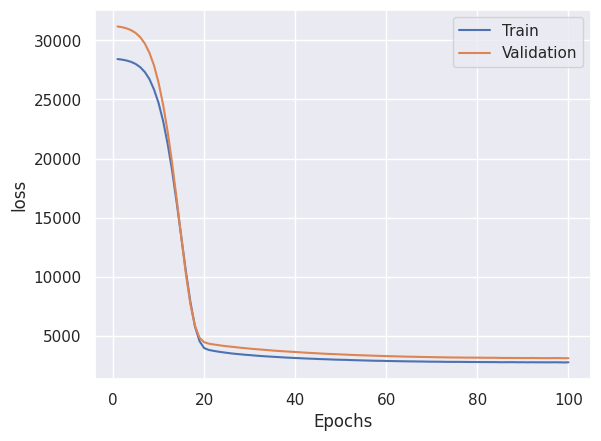

KeyError: 'mean_squared_error'

In [12]:
plot_loss_curve(total_epoch=100, start = 1)
plot_mse_curve(total_epoch=100, start = 1)

In [14]:
res = model.evaluate(X_test, y_test, verbose = 1)
print(f'테스트 세트의 MSE : {round(res[1], 4)}')

3/3 [==============================] - 0s 4ms/step - loss: 3277.7581 - mse: 3277.7581
테스트 세트의 MSE : 3277.7581


3/3 [==============================] - 0s 3ms/step


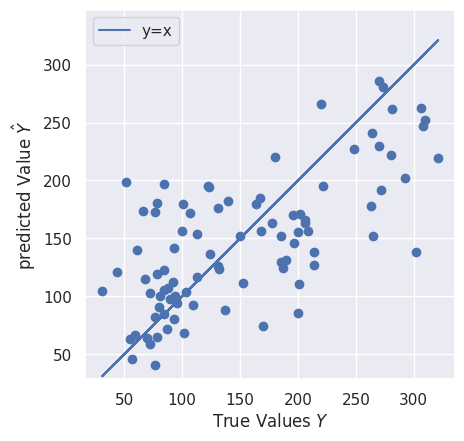

In [15]:
import matplotlib.pyplot as plt
plt.scatter(y_test, model.predict(X_test))
plt.xlabel("True Values $Y$")
plt.ylabel("predicted Value $\hat{Y}$")
plt.axis("equal")
plt.axis("square")
plt.plot(y_test, y_test, label = "y=x")
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import r2_score
score = r2_score(y_test, model.predict(X_test))
score

3/3 [==============================] - 0s 6ms/step


0.465350929776261

In [17]:
import tensorflow as tf
model = tf.keras.Sequential([
 # input layer
 tf.keras.layers.Dense(256, activation = "relu", input_dim = (len(df.columns)-1)),

 # hidden layer
 tf.keras.layers.Dense(128, activation = "relu"),
 tf.keras.layers.Dense(64, activation = "relu"),
 tf.keras.layers.Dense(32, activation = "relu"),
 tf.keras.layers.Dense(16, activation = "relu"),

 # output layer
 tf.keras.layers.Dense(1, activation = "linear")
])
# model compile
model.compile(optimizer = "adam", loss = "mse", metrics = ['mse'])
# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               2816      
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 46593 (182.00 KB)
Trainable params: 4659

In [18]:
history = model.fit(X_train, y_train, batch_size = 32,
 epochs = 100, validation_split = 0.2, verbose = 0)

KeyError: 'mean_squared_error'

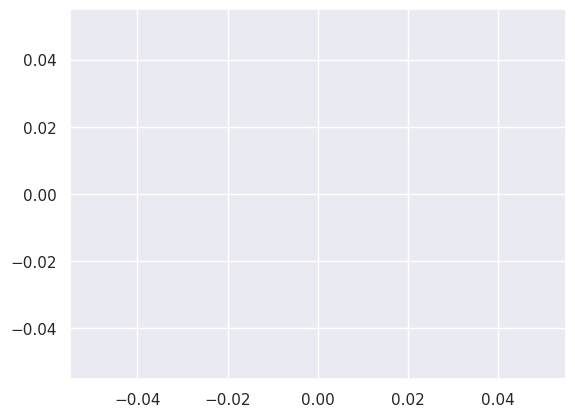

In [19]:
plot_loss_curve(total_epoch=100, start = 1)
plot_mse_curve(total_epoch=100, start = 1)

In [20]:
res = model.evaluate(X_test, y_test, verbose = 1)
print(f'테스트 세트의 MSE : {round(res[1], 4)}')

3/3 [==============================] - 0s 4ms/step - loss: 3206.0627 - mse: 3206.0627
테스트 세트의 MSE : 3206.0627


3/3 [==============================] - 0s 4ms/step


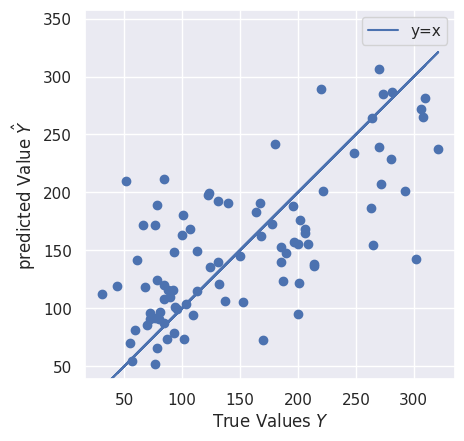

In [21]:
# plot
import matplotlib.pyplot as plt
plt.scatter(y_test, model.predict(X_test))
plt.xlabel("True Values $Y$")
plt.ylabel("predicted Value $\hat{Y}$")
plt.axis("equal")
plt.axis("square")
plt.plot(y_test, y_test, label = "y=x")
plt.legend()
plt.show()

In [22]:
# R_square
from sklearn.metrics import r2_score
score = r2_score(y_test, model.predict(X_test))
score

3/3 [==============================] - 0s 6ms/step


0.4770454444104717

In [23]:
import tensorflow as tf
model = tf.keras.Sequential([
 # input layer
 tf.keras.layers.Dense(256, activation = "relu", input_dim = (len(df.columns)-1)),
 tf.keras.layers.BatchNormalization(),

 # hidden layer
 tf.keras.layers.Dense(128, activation = "relu"),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Dense(64, activation = "relu"),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Dense(32, activation = "relu"),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Dense(16, activation = "relu"),
 tf.keras.layers.BatchNormalization(),

 # output layer
 tf.keras.layers.Dense(1, activation = "linear")
])
# model compile
model.compile(optimizer = "adam", loss = "mse", metrics = ['mse'])
# model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               2816      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_2 (Bat  (None, 64)               

In [25]:
history = model.fit(X_train, y_train, batch_size = 32,
 epochs = 500, validation_split = 0.2, verbose = 0)

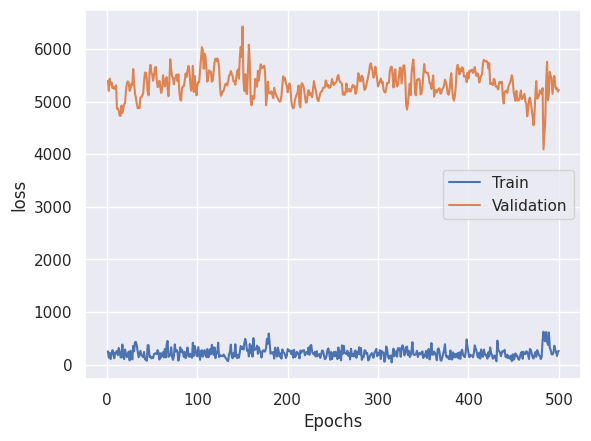

KeyError: 'mean_squared_error'

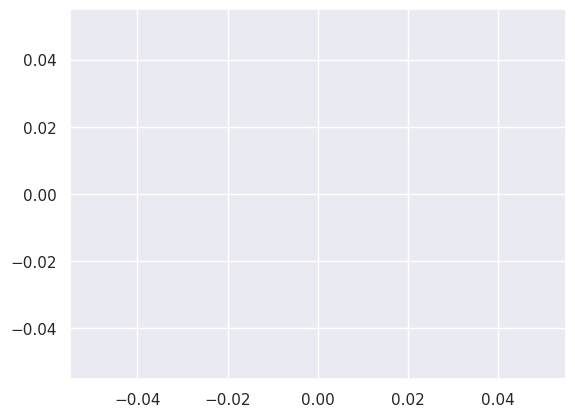

In [26]:
plot_loss_curve(total_epoch=500, start = 1)
plot_mse_curve(total_epoch=500, start = 1)

In [27]:
res = model.evaluate(X_test, y_test, verbose = 1)
print(f'테스트 세트의 MSE : {round(res[1], 4)}')

3/3 [==============================] - 0s 5ms/step - loss: 4474.2271 - mse: 4474.2271
테스트 세트의 MSE : 4474.2271


3/3 [==============================] - 0s 4ms/step


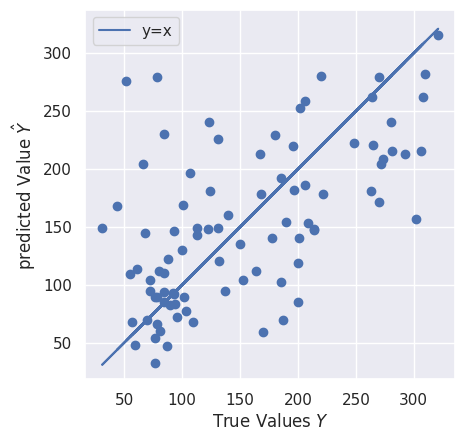

In [28]:
# plot
import matplotlib.pyplot as plt
plt.scatter(y_test, model.predict(X_test))
plt.xlabel("True Values $Y$")
plt.ylabel("predicted Value $\hat{Y}$")
plt.axis("equal")
plt.axis("square")
plt.plot(y_test, y_test, label = "y=x")
plt.legend()
plt.show()

In [29]:
# R_square
from sklearn.metrics import r2_score
score = r2_score(y_test, model.predict(X_test))
score

3/3 [==============================] - 0s 5ms/step


0.2701897625726679

In [30]:
import tensorflow as tf
model = tf.keras.Sequential([
 # input layer
 tf.keras.layers.Dense(256, activation = "relu", input_dim = (len(df.columns)-1),
 kernel_initializer = "he_normal"),

 # hidden layer
 tf.keras.layers.Dense(128, activation = "relu"),
 tf.keras.layers.Dense(64, activation = "relu"),
 tf.keras.layers.Dense(32, activation = "relu"),
 tf.keras.layers.Dense(16, activation = "relu"),

 # output layer
 tf.keras.layers.Dense(1, activation = "linear")
])
# model compile
model.compile(optimizer = "adam", loss = "mse", metrics = ['mse'])
# model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               2816      
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 46593 (182.00 KB)
Trainable params: 4659

In [31]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.2,
verbose = 0)

KeyError: 'mean_squared_error'

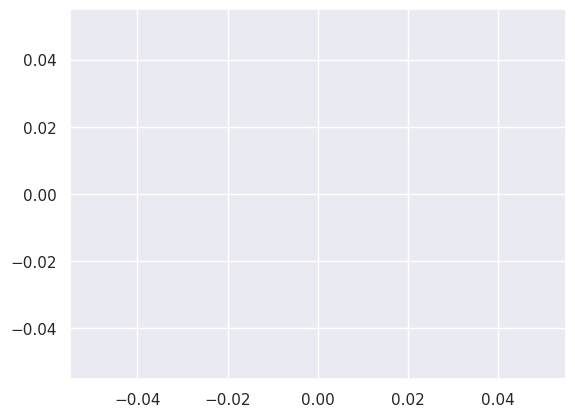

In [32]:
plot_loss_curve(total_epoch=100, start = 1)
plot_mse_curve(total_epoch=100, start = 1)

In [33]:
res = model.evaluate(X_test, y_test, verbose = 1)
print(f'테스트 세트의 MSE : {round(res[1], 4)}')

3/3 [==============================] - 0s 5ms/step - loss: 3184.2668 - mse: 3184.2668
테스트 세트의 MSE : 3184.2668


In [34]:
# plot
import matplotlib.pyplot as plt
plt.scatter(y_test, model.predict(X_test))
plt.xlabel("True Values $Y$")
plt.ylabel("predicted Value $\hat{Y}$")
plt.axis("equal")
plt.axis("square")
plt.plot(y_test, y_test, label = "y=x")
plt.legend()
plt.show()

3/3 [==============================] - 0s 4ms/step


In [35]:
# R_square
from sklearn.metrics import r2_score
score = r2_score(y_test, model.predict(X_test))
score

3/3 [==============================] - 0s 4ms/step


0.4806006369993615

In [36]:
import tensorflow as tf
model = tf.keras.Sequential([
 # input layer
 tf.keras.layers.Dense(256, activation = "relu", input_dim = (len(df.columns)-1)),
 tf.keras.layers.Dropout(0.2),

 # hidden layer
 tf.keras.layers.Dense(128, activation = "relu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(64, activation = "relu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(32, activation = "relu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(16, activation = "relu"),
 tf.keras.layers.Dropout(0.2),

 # output layer
 tf.keras.layers.Dense(1, activation = "linear")
])
# model compile
model.compile(optimizer = "adam", loss = "mse", metrics = ['mse'])
# model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               2816      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 32)               

In [37]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500, validation_split = 0.2,
verbose = 0)

KeyError: 'mean_squared_error'

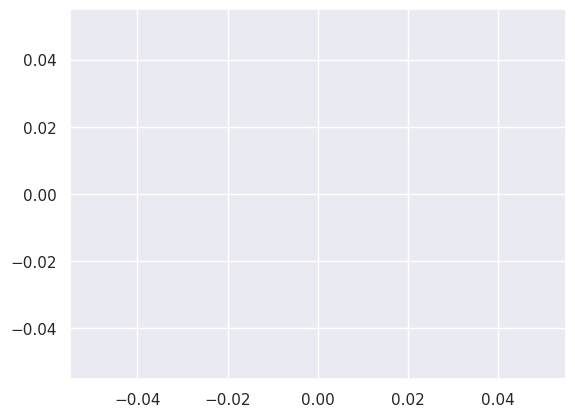

In [38]:
plot_loss_curve(total_epoch=500, start = 1)
plot_mse_curve(total_epoch=500, start = 1)

In [39]:
res = model.evaluate(X_test, y_test, verbose = 1)
print(f'테스트 세트의 MSE : {round(res[1], 4)}')

3/3 [==============================] - 0s 5ms/step - loss: 4063.7883 - mse: 4063.7883
테스트 세트의 MSE : 4063.7883


In [40]:
# plot
import matplotlib.pyplot as plt
plt.scatter(y_test, model.predict(X_test))
plt.xlabel("True Values $Y$")
plt.ylabel("predicted Value $\hat{Y}$")
plt.axis("equal")
plt.axis("square")
plt.plot(y_test, y_test, label = "y=x")
plt.legend()
plt.show()

3/3 [==============================] - 0s 4ms/step


In [41]:
# R_square
from sklearn.metrics import r2_score
score = r2_score(y_test, model.predict(X_test))
score

3/3 [==============================] - 0s 4ms/step


0.33713818652976457

In [42]:
# import package
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [43]:
# 랜덤 시드 고정
SEED = 22
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [45]:
# import dataset
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

IndentationError: unexpected indent (<ipython-input-45-8bd446e383cf>, line 2)

In [ ]:
df = pd.DataFrame(boston_housing.data, columns = boston_housing.feature_names)
df['MEDV'] = boston_housing.target
df.head(3)

In [ ]:
df['CHAS'].value_counts()

In [ ]:
# OneHotEncoder
df = pd.get_dummies(data = df, columns = ['CHAS'], prefix = ['CHAS'])
df.head(3)

In [ ]:
# df 의 column 순서 변경
df = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS',
 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'CHAS_0.0', 'CHAS_1.0', 'MEDV']]

In [62]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [47]:
# 랜덤 시드 고정
SEED = 22
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [60]:
import warnings
warnings.simplefilter('ignore')

In [102]:
from keras.utils import get_file

In [99]:
# 변수명
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
 'Acceleration', 'Model Year', 'Origin']
# 데이터 로드
mydata = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', names=column_names, na_values = "?", comment='\t',
 sep=" ", skipinitialspace=True)
mydata.head()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1

In [104]:
mydata = mydata.dropna()

In [105]:
sns.pairplot(mydata[['Cylinders','Displacement','Horsepower','Weight',
 'Acceleration', 'Model Year', 'Origin']], diag_kind="kde")
plt.show()

In [106]:
mydata = pd.get_dummies(data = mydata, columns = ['Cylinders', 'Origin'], prefix = ['Cylinders',
'Origin'])

In [107]:
X = mydata.iloc[:, 1:]
Y = mydata.iloc[:, 0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
 shuffle=True, random_state = SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(313, 13) (313,)
(79, 13) (79,)


In [108]:
# feature scaling
from sklearn import preprocessing
# normalization
minmax_scaler = preprocessing.MinMaxScaler()
norm_fit = minmax_scaler.fit(X_train)
X_train_norm = norm_fit.transform(X_train)
X_test_norm = norm_fit.transform(X_test)
# standardization
standard_scaler = preprocessing.StandardScaler()
stan_fit = standard_scaler.fit(X_train)
X_train_stan = stan_fit.transform(X_train)
X_test_stan = stan_fit.transform(X_test)

In [109]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = tf.keras.Sequential([

 # hidden layer
 tf.keras.layers.Dense(64, activation = 'relu', input_shape = (13,)),
 tf.keras.layers.Dense(64, activation = 'relu'),

 # output layer
 tf.keras.layers.Dense(1, activation = 'linear')
])
model.compile(optimizer = tf.keras.optimizers.RMSprop(0.001), loss = 'mse',
 metrics = ['mae', 'mse'])

In [110]:
history = model.fit(X_train_norm, y_train, epochs = 1000, validation_split = 0.2, verbose = 0)

In [111]:
import matplotlib.pyplot as plt
def plot_history(history):
 hist = pd.DataFrame(history.history)
 hist['epoch'] = history.epoch

 plt.figure(figsize=(15,8))

 plt.subplot(1,2,1)
 plt.xlabel('Epoch')
 plt.ylabel('Loss [MPG]')
 plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
 plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
 plt.legend()
 plt.subplot(1,2,2)
 plt.xlabel('Epoch')
 plt.ylabel('Mean Square Error [$MPG^2$]')
 plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
 plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
 plt.legend()
 plt.show()
plot_history(history)

KeyError: 'mean_squared_error'

In [112]:
# patience 매개변수는 성능 향상을 체크할 에포크 횟수
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_norm, y_train, epochs=1000,
 validation_split = 0.2, verbose=0, callbacks=[early_stop])
plot_history(history)

KeyError: 'mean_squared_error'

In [113]:
loss, mae, mse = model.evaluate(X_train_norm, y_train, verbose=2)
print(f"테스트 세트의 MSE: {round(mse,3)} MPG")

10/10 - 0s - loss: 4.5375 - mae: 1.4520 - mse: 4.5375 - 36ms/epoch - 4ms/step
테스트 세트의 MSE: 4.538 MPG


In [114]:
test_predictions = model.predict(X_test_norm).flatten()

3/3 [==============================] - 0s 4ms/step


In [115]:
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values $Y$ [MPG]')
plt.ylabel('Predicted Values $\hat{Y}$ [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [116]:
from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, test_predictions)
r2_y_predict

0.8771898638660877

KeyError: 'mean_squared_error'

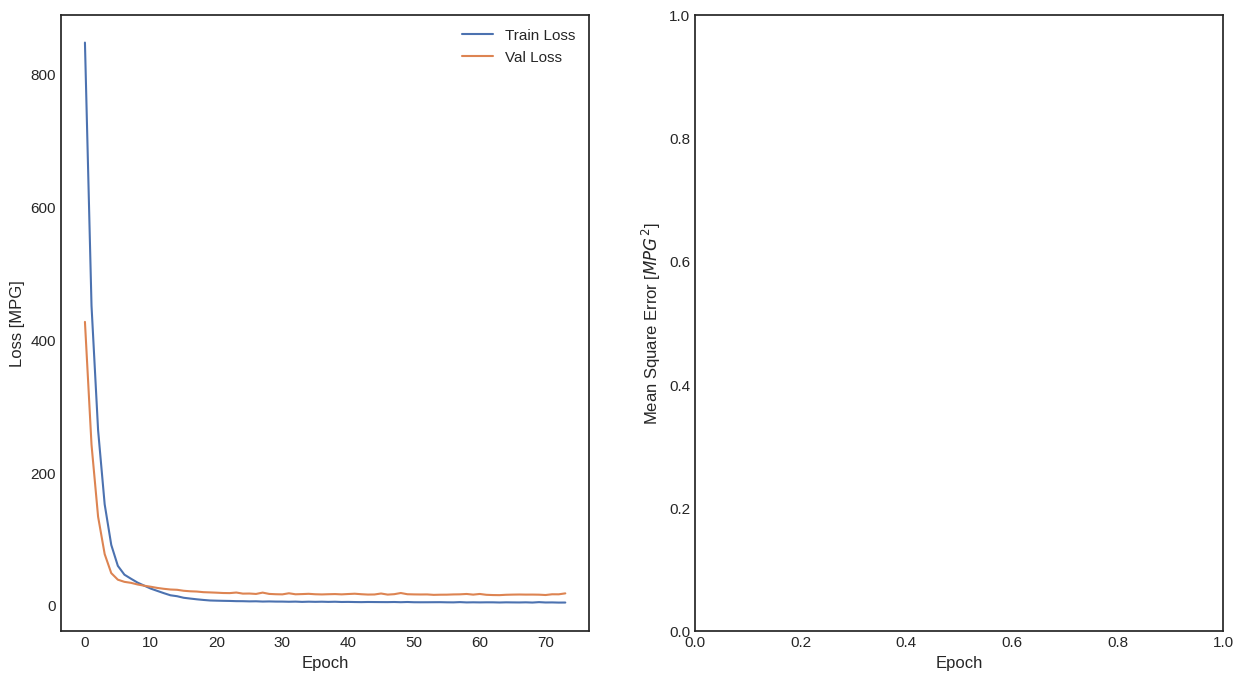

In [117]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_stan, y_train, epochs=1000,
 validation_split = 0.2, verbose=0, callbacks=[early_stop])
plot_history(history)

In [118]:
loss, mae, mse = model.evaluate(X_train_stan, y_train, verbose=2)
print(f"테스트 세트의 MSE: {round(mse,3)} MPG")

10/10 - 0s - loss: 7.0022 - mae: 1.8004 - mse: 7.0022 - 37ms/epoch - 4ms/step
테스트 세트의 MSE: 7.002 MPG


3/3 [==============================] - 0s 3ms/step


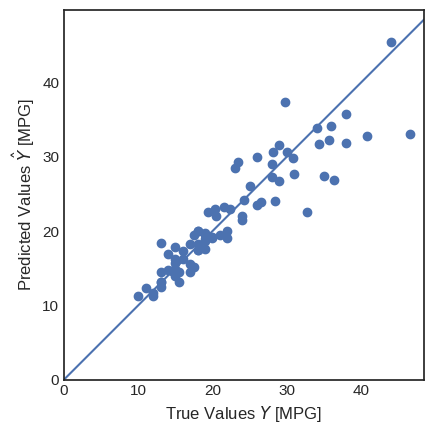

In [119]:
test_predictions = model.predict(X_test_stan).flatten()
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values $Y$ [MPG]')
plt.ylabel('Predicted Values $\hat{Y}$ [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [120]:
from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, test_predictions)
r2_y_predict

0.8339075522302221

In [121]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
sns.set_theme(color_codes = True)

In [122]:
SEED = 22
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [126]:
red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [127]:
# 새로운 변수로 'type'을 설정 후 red -> 0, white -> 1 로 할당
red['type'] = 0
white['type'] = 1
# 데이터 병합
wine = pd.concat([red, white])
wine_copied = wine.copy()
wine.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
2      9.8        5     0

In [128]:
# OneHotEncoder
wine = pd.get_dummies(data = wine, columns = ['quality', 'type'], prefix = ['quality', 'type'])

In [129]:
plt.hist(wine_copied['type'])
plt.xticks([0, 1])
plt.show()

In [130]:
# train/test split
X = wine.iloc[:, :-2]
y = wine.iloc[:,-2:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
 shuffle = True, random_state = SEED)

In [131]:
# feature scaling
from sklearn import preprocessing
# normalization
minmax_scaler = preprocessing.MinMaxScaler()
norm_fit = minmax_scaler.fit(X_train)
X_train_norm = norm_fit.transform(X_train)
X_test_norm = norm_fit.transform(X_test)
# standardization
standard_scaler = preprocessing.StandardScaler()
stan_fit = standard_scaler.fit(X_train)
X_train_stan = stan_fit.transform(X_train)
X_test_stan = stan_fit.transform(X_test)

In [133]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = tf.keras.Sequential([

 # hidden layer
 tf.keras.layers.Dense(units=48, activation='relu', input_shape=(18,)), # input_shape = numberof feature
 tf.keras.layers.Dense(units=24, activation='relu'),
 tf.keras.layers.Dense(units=12, activation='relu'),

 # output layer
 tf.keras.layers.Dense(units=2, activation='softmax')
])
# model compile
# 분류 문제의 경우 손실함수는 categorical crossentropy
# 분류 문제는 정확도로 퍼포먼스를 측정하기 때문에 metrics=['accuracy']를 반드시 설정
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
 loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 48)                912       
                                                                 
 dense_34 (Dense)            (None, 24)                1176      
                                                                 
 dense_35 (Dense)            (None, 12)                300       
                                                                 
 dense_36 (Dense)            (None, 2)                 26        
                                                                 
Total params: 2414 (9.43 KB)
Trainable params: 2414 (9.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:
# wine_norm
history = model.fit(X_train_norm, y_train, epochs=25, batch_size=32, validation_split=0.25,
verbose = 0)

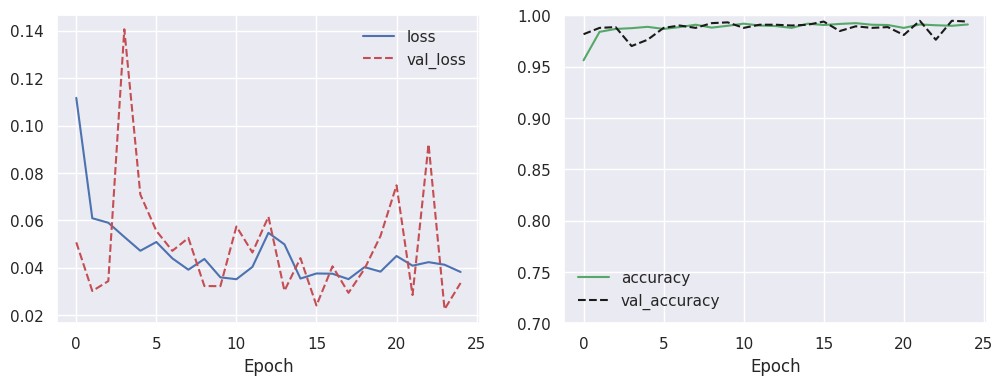

In [137]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()
plt.show()

In [138]:
loss, acc = model.evaluate(X_test_norm, y_test)
acc

41/41 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9969


0.9969230890274048

In [139]:
# wine = 1, red = 0 인 type_1 column 추출
y_test_c = y_test.iloc[:, 1]
# 0.9 이상인 확률은 1, 아닐 경우 0
predictions = model.predict(X_test_norm)
y_pred = (predictions > 0.9)
# confusion matrix
from sklearn import metrics
matrix = metrics.confusion_matrix(y_pred.argmax(axis = 1), y_test_c)
matrix

41/41 [==============================] - 0s 1ms/step


array([[314,  16],
       [  0, 970]])

In [140]:
import pandas as pd
table = pd.DataFrame(matrix, columns = ["white", "red"], index = ["white", "red"])
table

white  red
white    314   16
red        0  970

In [141]:
# wine_stan
history = model.fit(X_train_stan, y_train, epochs=25, batch_size=32, validation_split=0.25,
verbose = 1)

Epoch 1/25
122/122 [==============================] - 1s 7ms/step - loss: 0.9429 - accuracy: 0.9197 - val_loss: 0.1704 - val_accuracy: 0.9515
Epoch 2/25
122/122 [==============================] - 1s 5ms/step - loss: 0.5331 - accuracy: 0.9577 - val_loss: 0.9141 - val_accuracy: 0.9677
Epoch 3/25
122/122 [==============================] - 1s 5ms/step - loss: 0.1971 - accuracy: 0.9615 - val_loss: 0.2361 - val_accuracy: 0.9562
Epoch 4/25
122/122 [==============================] - 1s 6ms/step - loss: 0.1071 - accuracy: 0.9725 - val_loss: 0.1138 - val_accuracy: 0.9700
Epoch 5/25
122/122 [==============================] - 1s 7ms/step - loss: 0.1002 - accuracy: 0.9759 - val_loss: 0.1098 - val_accuracy: 0.9692
Epoch 6/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0955 - accuracy: 0.9759 - val_loss: 0.1150 - val_accuracy: 0.9692
Epoch 7/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0922 - accuracy: 0.9779 - val_loss: 0.0952 - val_accuracy: 0.9754
Epoch 

In [142]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], 'g-', label='accuracy')
plt.plot(history.history['val_acc'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()
plt.show()

KeyError: 'acc'

In [143]:
loss, acc = model.evaluate(X_test_stan, y_test)
acc

41/41 [==============================] - 3s 83ms/step - loss: 0.0239 - accuracy: 0.9931


0.9930769205093384

In [145]:
# wine = 1, red = 0 인 type_1 column 추출
y_test_c = y_test.iloc[:, 1]
# 0.9 이상인 확률은 1, 아닐 경우 0
predictions = model.predict(X_test_stan)
y_pred = (predictions > 0.9)
# confusion matrix
from sklearn import metrics
matrix = metrics.confusion_matrix(y_pred.argmax(axis = 1), y_test_c)
matrix

41/41 [==============================] - 0s 5ms/step


array([[313,  18],
       [  1, 968]])

In [146]:
import pandas as pd
table = pd.DataFrame(matrix, columns = ["white", "red"], index = ["white", "red"])
table

white  red
white    313   18
red        1  968

In [147]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
sns.set_theme(color_codes = True)

In [148]:
SEED = 22
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [149]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [150]:
# 와인 데이터셋 병합
wine = pd.concat([red, white])
wine.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5

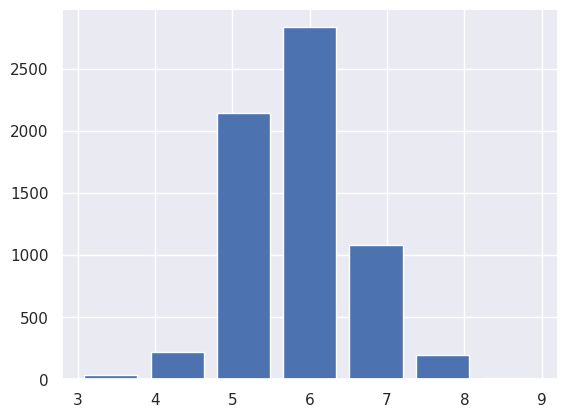

In [151]:
# 품질 히스토그램
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

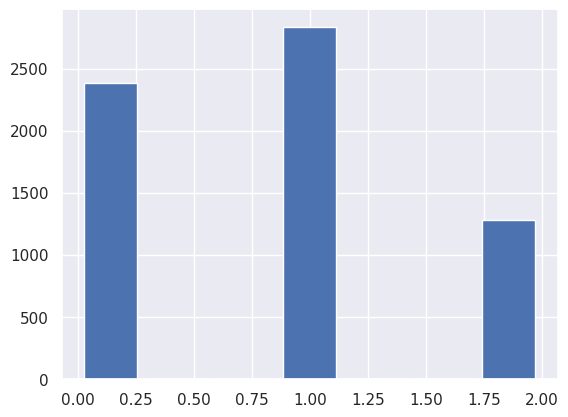

In [152]:
# 품질을 3 개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2
# histogram
plt.hist(wine['new_quality'], bins=7, rwidth=0.8)
plt.show()

In [153]:
wine = wine.drop("quality", axis = 1)

In [154]:
# OneHotEncoder
wine = pd.get_dummies(data = wine, columns = ['new_quality'], prefix = ['new_quality'])

In [155]:
# train/test split
X = wine.iloc[:, :-3]
y = wine.iloc[:,-3:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
 shuffle = True, random_state = SEED)

In [156]:
# feature scaling
from sklearn import preprocessing
# normalization
minmax_scaler = preprocessing.MinMaxScaler()
norm_fit = minmax_scaler.fit(X_train)
X_train_norm = norm_fit.transform(X_train)
X_test_norm = norm_fit.transform(X_test)

In [157]:
# standardization
standard_scaler = preprocessing.StandardScaler()
stan_fit = standard_scaler.fit(X_train)
X_train_stan = stan_fit.transform(X_train)
X_test_stan = stan_fit.transform(X_test)

In [158]:
model = tf.keras.Sequential([
 tf.keras.layers.Dense(units=48, activation='relu', input_shape=(11,)),
 tf.keras.layers.Dense(units=24, activation='relu'),
 tf.keras.layers.Dense(units=12, activation='relu'),
 tf.keras.layers.Dense(units=3, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
 loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 48)                576       
                                                                 
 dense_38 (Dense)            (None, 24)                1176      
                                                                 
 dense_39 (Dense)            (None, 12)                300       
                                                                 
 dense_40 (Dense)            (None, 3)                 39        
                                                                 
Total params: 2091 (8.17 KB)
Trainable params: 2091 (8.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [159]:
history = model.fit(X_train_norm, y_train, epochs=100, batch_size=1, validation_split=0.25,
verbose = 0)

KeyError: 'acc'

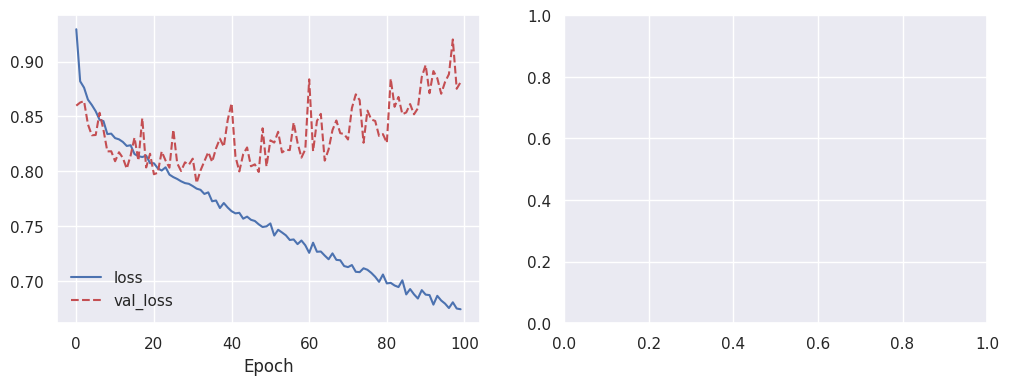

In [160]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], 'g-', label='accuracy')
plt.plot(history.history['val_acc'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [161]:
# 다항 분류 모델 평가
model.evaluate(X_test_norm, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.8893 - accuracy: 0.6154


[0.8893240094184875, 0.6153846383094788]

In [162]:
predictions = model.predict(X_test_norm)

41/41 [==============================] - 0s 1ms/step


In [163]:
y_pred = []
for i in range(0, len(y_test)):
 if np.argmax(predictions[i])==0:
  y_pred.append(0)
 elif np.argmax(predictions[i])==1:
  y_pred.append(1)
 elif np.argmax(predictions[i])==2:
  y_pred.append(2)

In [164]:
y_test_c = []
for i in range(0, len(y_test)):
 if np.argmax(y_test.iloc[i,:])==0:
  y_test_c.append(0)
 elif np.argmax(y_test.iloc[i,:])==1:
  y_test_c.append(1)
 elif np.argmax(y_test.iloc[i,:])==2:
  y_test_c.append(2)

In [165]:
# confusion matrix
from sklearn import metrics
matrix = metrics.confusion_matrix(y_pred, y_test_c)
matrix

array([[327, 142,  14],
       [138, 374, 139],
       [  5,  62,  99]])

In [166]:
label = ["new_quality_1", "new_quality_2", "new_quality_3"]
import pandas as pd
table = pd.DataFrame(matrix, columns = label, index = label)
table

new_quality_1  new_quality_2  new_quality_3
new_quality_1            327            142             14
new_quality_2            138            374            139
new_quality_3              5             62             99

In [167]:
history = model.fit(X_train_stan, y_train, epochs=100, batch_size=1, validation_split=0.25,
verbose = 0)

KeyError: 'acc'

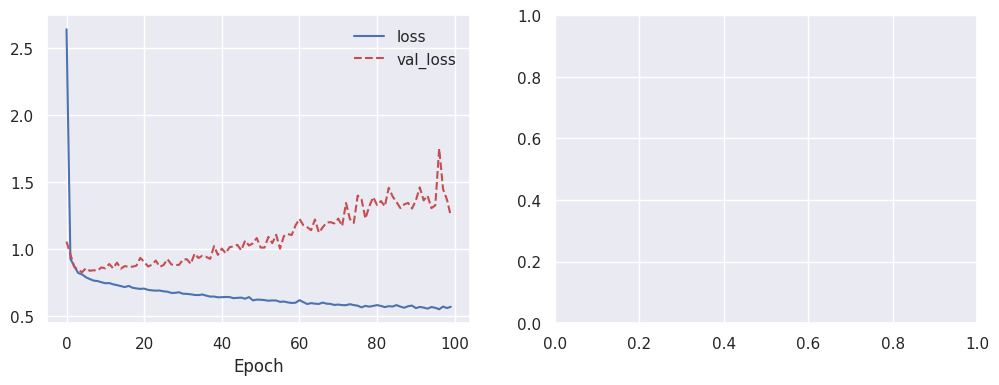

In [168]:
# 다항 분류 모델 학습 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], 'g-', label='accuracy')
plt.plot(history.history['val_acc'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [169]:
# 다항 분류 모델 평가
model.evaluate(X_test_stan, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 2.2715 - accuracy: 0.5938


[2.271509885787964, 0.5938461422920227]

In [170]:
predictions = model.predict(X_test_stan)

41/41 [==============================] - 0s 1ms/step


In [171]:
y_pred = []
for i in range(0, len(y_test)):
 if np.argmax(predictions[i])==0:
  y_pred.append(0)
 elif np.argmax(predictions[i])==1:
  y_pred.append(1)
 elif np.argmax(predictions[i])==2:
  y_pred.append(2)

In [172]:
y_test_c = []
for i in range(0, len(y_test)):
 if np.argmax(y_test.iloc[i,:])==0:
  y_test_c.append(0)
 elif np.argmax(y_test.iloc[i,:])==1:
  y_test_c.append(1)
 elif np.argmax(y_test.iloc[i,:])==2:
  y_test_c.append(2)

In [173]:
# confusion matrix
from sklearn import metrics
matrix = metrics.confusion_matrix(y_pred, y_test_c)
matrix

array([[310, 152,   7],
       [159, 377, 160],
       [  1,  49,  85]])

In [174]:
label = ["new_quality_1", "new_quality_2", "new_quality_3"]
import pandas as pd
table = pd.DataFrame(matrix, columns = label, index = label)
table

new_quality_1  new_quality_2  new_quality_3
new_quality_1            310            152              7
new_quality_2            159            377            160
new_quality_3              1             49             85

In [175]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set_theme(color_codes = True)

In [176]:
import tensorflow as tf
def generate_model():
 model = tf.keras.Sequential([
 # first convolutional layer
 tf.keras.layers.Conv2D(32, filter_size = 3, activation = 'relu'),
 tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

 # second convolutional layer
 tf.keras.layers.Conv2D(64, filter_size = 3, activation = 'relu'),
 tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

 # fully connected classifier
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(1024, activation = 'relu'),
 tf.keras.layers.Dense(10, activation = 'softmax') # 10 classes
 ])

 return model

In [178]:
# import library
import sys
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical, plot_model
import numpy as np
import matplotlib.pyplot as plt

In [179]:
# hyperparameter
batch_size = 128
num_classes = 10
epochs = 12

In [180]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [181]:
print(f'x_train : {x_train.shape}') # (데이터 개수, 28 X 28 pixel)
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


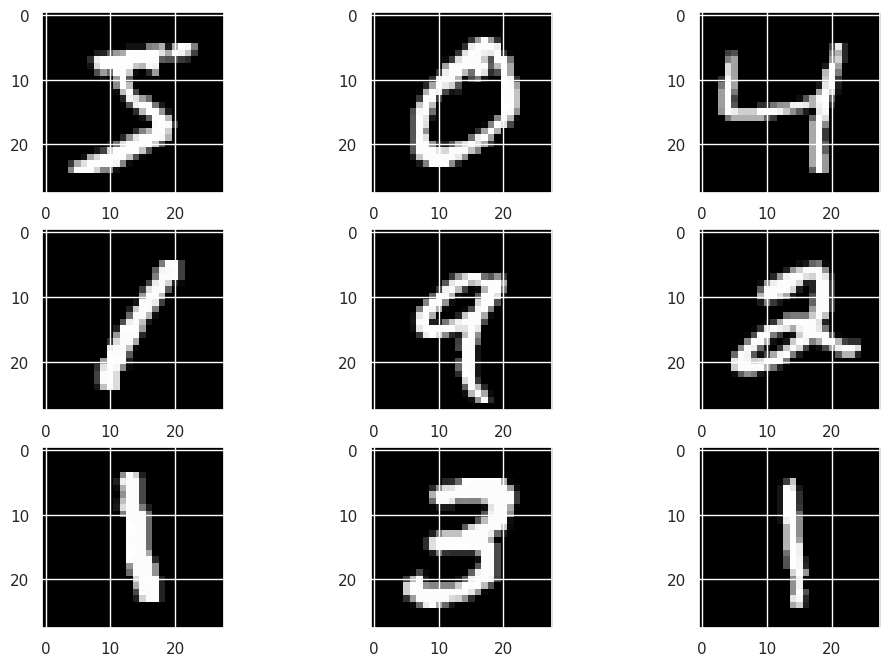

In [182]:
plt.figure(figsize=(12,8))
count = 0
for i in range(9):
 count += 1
 plt.subplot(3,3,count)
 plt.imshow(x_train[i].reshape(28,28), cmap = plt.get_cmap('gray'), interpolation='nearest')
plt.show()

In [183]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
# reshaping mnist dataset
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32')

In [184]:
# Scale images to the [0, 1] range
x_train /= 255.
x_test /= 255.

In [185]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [186]:
# convolutional nueral network
model = keras.Sequential([
 layers.Conv2D(32, kernel_size = (5, 5), strides = 1, activation = 'relu', input_shape =
input_shape),
 layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
 layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu'),
 layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
 layers.Flatten(),
 layers.Dropout(0.5),
 layers.Dense(num_classes, activation = 'softmax')
])

In [187]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=10, verbose=1,
 validation_data=(x_test, y_test)) # epochs 조정

Epoch 1/10
469/469 [==============================] - 49s 102ms/step - loss: 0.3556 - accuracy: 0.8914 - val_loss: 0.0829 - val_accuracy: 0.9753
Epoch 2/10
469/469 [==============================] - 57s 121ms/step - loss: 0.1078 - accuracy: 0.9675 - val_loss: 0.0587 - val_accuracy: 0.9811
Epoch 3/10
469/469 [==============================] - 62s 132ms/step - loss: 0.0847 - accuracy: 0.9740 - val_loss: 0.0514 - val_accuracy: 0.9827
Epoch 4/10
469/469 [==============================] - 59s 126ms/step - loss: 0.0725 - accuracy: 0.9779 - val_loss: 0.0400 - val_accuracy: 0.9861
Epoch 5/10
469/469 [==============================] - 42s 90ms/step - loss: 0.0654 - accuracy: 0.9800 - val_loss: 0.0392 - val_accuracy: 0.9876
Epoch 6/10
469/469 [==============================] - 59s 125ms/step - loss: 0.0599 - accuracy: 0.9818 - val_loss: 0.0335 - val_accuracy: 0.9888
Epoch 7/10
469/469 [==============================] - 54s 116ms/step - loss: 0.0548 - accuracy: 0.9826 - val_loss: 0.0309 - val_acc

In [188]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.030800029635429382
Test accuracy: 0.9898999929428101


In [203]:
import random
import matplotlib.pyplot as plt
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1) # 확률의 최대값의 index 를 추출하며 여기서는 index 가 label 과 동일하다.
test_labels = np.argmax(y_test, axis=1)
count = 0

313/313 [==============================] - 3s 9ms/step


In [204]:
plt.figure(figsize=(12,8))
for n in range(16):
 count += 1
 plt.subplot(4, 4, count)
 plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
 tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
 plt.title(tmp)
plt.tight_layout()
plt.show()

In [205]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
ypred_class=np.argmax(y_pred,axis=1)
ytest_class=np.argmax(y_test,axis=1)
print(ypred_class.size)
print(ytest_class.size)

313/313 [==============================] - 5s 16ms/step
10000
10000


In [206]:
conf_mat=confusion_matrix(ytest_class,ypred_class)
print(conf_mat)

[[ 976    1    0    0    0    0    1    1    1    0]
 [   0 1133    1    0    0    0    1    0    0    0]
 [   2    3 1021    0    1    0    2    1    2    0]
 [   0    0    3 1002    0    0    0    3    2    0]
 [   0    0    0    0  977    0    1    0    1    3]
 [   3    0    1    6    0  872    6    1    1    2]
 [   3    2    1    0    1    0  951    0    0    0]
 [   0    3    7    0    0    0    0 1016    1    1]
 [   3    1    2    0    1    0    2    0  963    2]
 [   3    2    0    0    8    2    0    3    3  988]]


In [207]:
label = range(10)
import pandas as pd
table = pd.DataFrame(conf_mat, columns = label, index = label)
table

0     1     2     3    4    5    6     7    8    9
0  976     1     0     0    0    0    1     1    1    0
1    0  1133     1     0    0    0    1     0    0    0
2    2     3  1021     0    1    0    2     1    2    0
3    0     0     3  1002    0    0    0     3    2    0
4    0     0     0     0  977    0    1     0    1    3
5    3     0     1     6    0  872    6     1    1    2
6    3     2     1     0    1    0  951     0    0    0
7    0     3     7     0    0    0    0  1016    1    1
8    3     1     2     0    1    0    2     0  963    2
9    3     2     0     0    8    2    0     3    3  988

In [208]:
misclassified=np.where(ypred_class!=ytest_class)
aa=np.asarray(misclassified)
print(misclassified)
print(len(misclassified[0]))

(array([  18,  340,  359,  445,  582,  646,  659,  740,  947, 1033, 1039,
       1062, 1112, 1226, 1232, 1242, 1260, 1281, 1299, 1326, 1393, 1621,
       1681, 1709, 1717, 1737, 1754, 1901, 2018, 2035, 2040, 2043, 2098,
       2109, 2118, 2129, 2130, 2135, 2293, 2387, 2414, 2462, 2488, 2597,
       2654, 2896, 2927, 2970, 3289, 3384, 3422, 3503, 3520, 3558, 3767,
       3806, 3808, 3850, 3869, 3985, 4007, 4027, 4075, 4163, 4176, 4205,
       4248, 4256, 4761, 4763, 4807, 4823, 4956, 5937, 5955, 5981, 5997,
       6505, 6560, 6571, 6576, 6597, 6625, 6651, 6783, 8059, 8408, 9009,
       9015, 9530, 9634, 9642, 9679, 9692, 9729, 9749, 9754, 9770, 9904,
       9905, 9982]),)
101


In [209]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
for i in range(16):
 plt.subplot(4,4,i+1)
 plt.imshow(x_test[aa[0,i]].reshape(28, 28), cmap='gray', interpolation='none')
 plt.title("True{},Pred{}".format(ytest_class[aa[0,i]],ypred_class[aa[0,i]]))
plt.tight_layout()

In [210]:
# import library
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout

170498071/170498071 [==============================] - 10s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


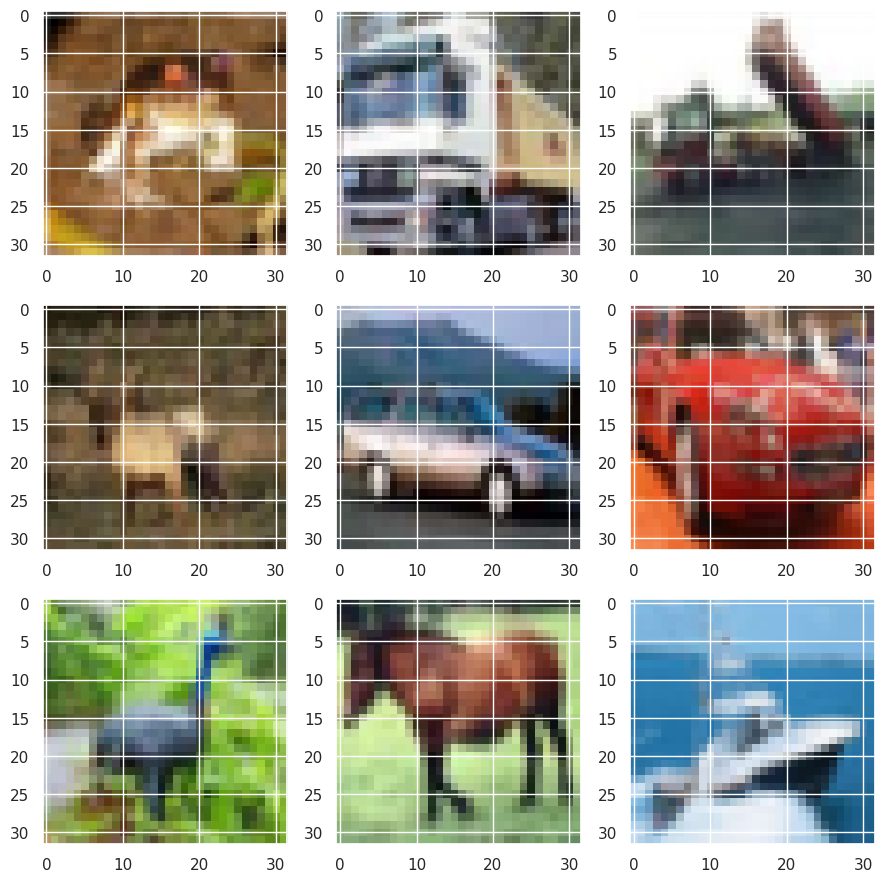

In [211]:
# example of loading the cifar10 dataset
import matplotlib.pyplot as plt
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(trainX[i])

# show the figure
plt.tight_layout()

In [212]:
trainY = to_categorical(trainy)
testY = to_categorical(testy)

In [213]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [214]:
# basic model
def basic_model():
 model = Sequential()
 model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same', input_shape=(32, 32, 3)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())

 model.add(Dense(10, activation='softmax'))

 # compile model
 opt = optimizers.Adam(learning_rate=0.001)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

 return model
# model summary
model = basic_model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 64)        

In [215]:
# setting callback option
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_accuracy', patience = 20)
mc = ModelCheckpoint("./model/checkpoint.{epoch:02d}.hdf5", monitor = "val_accuracy")

In [216]:
epochs = 100
batch_size = 32
history = model.fit(train_norm, trainY, epochs = epochs, batch_size = batch_size,
 validation_data = (test_norm, testY), verbose =1, callbacks = [es, mc])

Epoch 1/100
1563/1563 [==============================] - 100s 63ms/step - loss: 1.4193 - accuracy: 0.4977 - val_loss: 1.2076 - val_accuracy: 0.5798
Epoch 2/100
1563/1563 [==============================] - 93s 60ms/step - loss: 1.0546 - accuracy: 0.6349 - val_loss: 1.0022 - val_accuracy: 0.6548
Epoch 3/100
1563/1563 [==============================] - 104s 66ms/step - loss: 0.9247 - accuracy: 0.6790 - val_loss: 0.9737 - val_accuracy: 0.6641
Epoch 4/100
1563/1563 [==============================] - 104s 67ms/step - loss: 0.8460 - accuracy: 0.7081 - val_loss: 0.9242 - val_accuracy: 0.6821
Epoch 5/100
1563/1563 [==============================] - 87s 56ms/step - loss: 0.7788 - accuracy: 0.7313 - val_loss: 0.8872 - val_accuracy: 0.7010
Epoch 6/100
1563/1563 [==============================] - 74s 48ms/step - loss: 0.7282 - accuracy: 0.7492 - val_loss: 0.8547 - val_accuracy: 0.7042
Epoch 7/100
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6845 - accuracy: 0.7611 - val_loss

In [217]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
 plt.subplots(figsize = (15,6))
 plt.subplots_adjust(left=0.1, bottom=0.1, right=0.99, top=0.9, wspace=0.3, hspace=0.2)

 # plot loss
 plt.subplot(121)
 plt.title('Cross Entropy Loss')
 plt.plot(history.history['loss'], color='blue', label='train')
 plt.plot(history.history['val_loss'], color='orange', label='test')
 plt.legend()
  # plot accuracy
 plt.subplot(122)
 plt.title('Classification Accuracy')
 plt.plot(history.history['accuracy'], color='blue', label='train')
 plt.plot(history.history['val_accuracy'], color='orange', label='test')
 plt.legend()

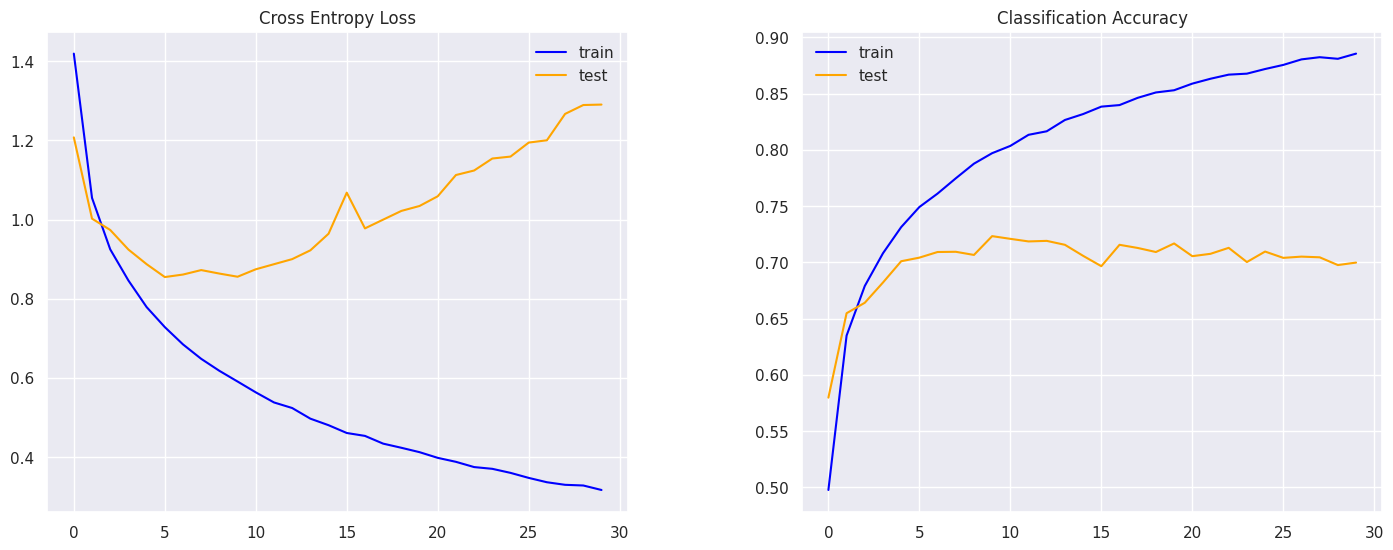

In [218]:
summarize_diagnostics(history)

In [219]:
# Evaluation
score = model.evaluate(test_norm, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2904936075210571
Test accuracy: 0.6998000144958496


In [220]:
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred=model.predict(test_norm)
ypred_class=np.argmax(y_pred,axis=1)
ytest_class=np.argmax(testY,axis=1)
conf_mat=confusion_matrix(ytest_class,ypred_class)
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
import pandas as pd
table = pd.DataFrame(conf_mat, columns = label, index = label)
table

313/313 [==============================] - 5s 15ms/step


airplane  automobile  bird  cat  deer  dog  frog  horse  ship  \
airplane         768          14    61   15    18   17     9      9    49   
automobile        31         805     7   10     4   15     7      5    37   
bird              60           5   626   61    54   86    64     29     6   
cat               34           7    72  523    40  219    61     27     9   
deer              20           5   103   91   573   77    67     52     9   
dog               16           2    59  169    33  643    24     36    13   
frog               8           4    44   52    24   43   803     12     7   
horse             20           6    48   39    56  120     9    688     3   
ship              85          30    13   16     8    7     4      5   805   
truck             52          92     8   14     3   20    11      9    27   

            truck  
airplane       40  
automobile     79  
bird            9  
cat             8  
deer            3  
dog             5  
frog            3  
horse          11  
ship           27  
truck         764

In [221]:
misclassified=np.where(ypred_class!=ytest_class)
aa=np.asarray(misclassified)
print(misclassified)
print(len(misclassified[0]))

(array([   2,    9,   17, ..., 9993, 9995, 9998]),)
3002


313/313 [==============================] - 3s 10ms/step


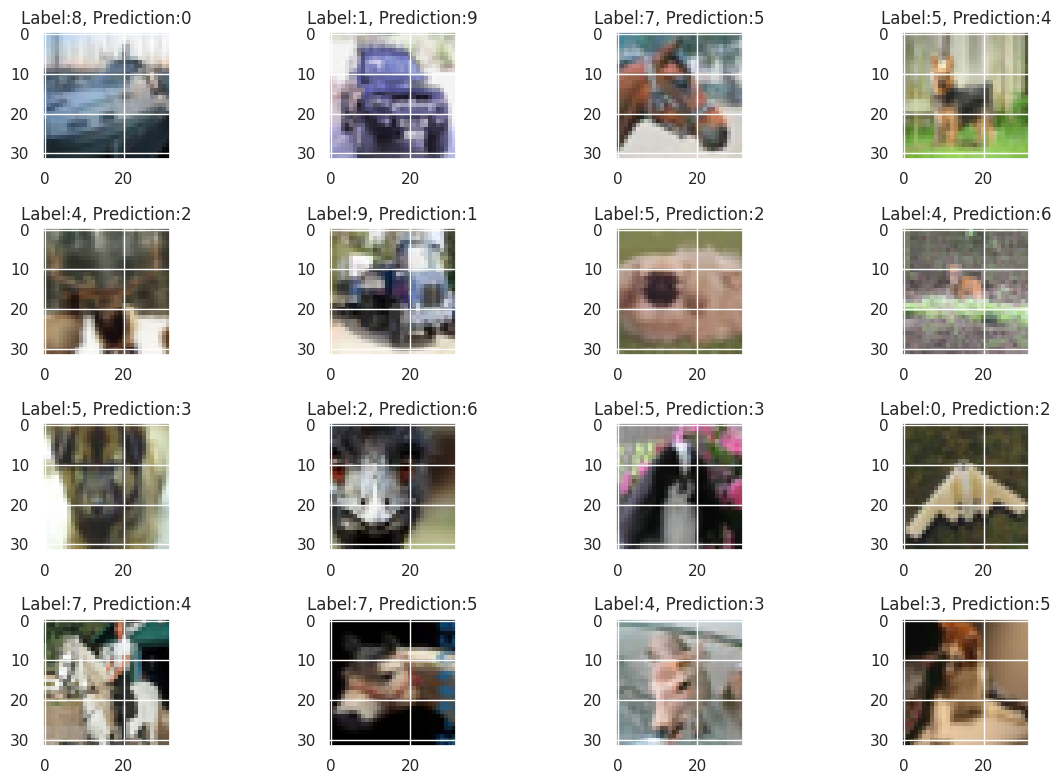

In [222]:
import random
import matplotlib.pyplot as plt
import numpy as np
predicted_result = model.predict(test_norm)
predicted_labels = np.argmax(predicted_result, axis=1) # 확률의 최대값의 index 를 추출하며 여기서는 index 가 label 과 동일하다.
test_labels = np.argmax(testY, axis=1)
count = 0
plt.figure(figsize=(12,8))
for n in range(16):
 i = misclassified[0][n]
 count += 1
 plt.subplot(4, 4, count)
 plt.imshow(test_norm[i], cmap='Greys', interpolation='nearest')
 tmp = "Label:" + str(test_labels[i]) + ", Prediction:" + str(predicted_labels[i])
 plt.title(tmp)
plt.tight_layout()
plt.show()

In [223]:
# import library
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


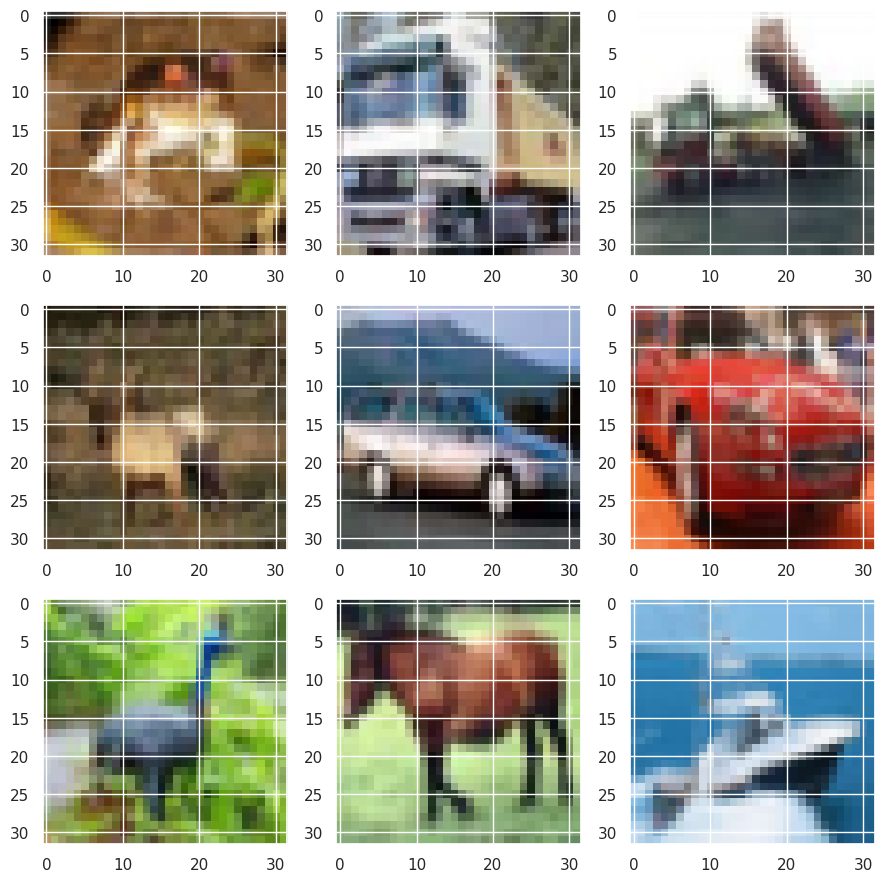

In [225]:
# example of loading the cifar10 dataset
import matplotlib.pyplot as plt
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(trainX[i])

# show the figure
plt.tight_layout()

In [226]:
trainY = to_categorical(trainy)
testY = to_categorical(testy)

In [227]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [228]:
# setting callback option
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = "val_accuracy", patience = 10)
mc = ModelCheckpoint("./model/checkpoint.{epoch:02d}.hdf5", monitor = "val_accuracy")

In [229]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
 plt.subplots(figsize = (15,6))
 plt.subplots_adjust(left=0.1, bottom=0.1, right=0.99, top=0.9, wspace=0.3, hspace=0.2)

 # plot loss
 plt.subplot(121)
 plt.title('Cross Entropy Loss')
 plt.plot(history.history['loss'], color='blue', label='train')
 plt.plot(history.history['val_loss'], color='orange', label='test')
 plt.legend()

 # plot accuracy
 plt.subplot(122)
 plt.title('Classification Accuracy')
 plt.plot(history.history['accuracy'], color='blue', label='train')
 plt.plot(history.history['val_accuracy'], color='orange', label='test')
 plt.legend()

In [230]:
# model 1
# NC = 1, BN = NO, FC = 0
def model_1():
 model = Sequential()
 model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same', input_shape=(32, 32, 3)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same'))
 model.add(MaxPooling2D((2, 2)))

 model.add(Flatten())

 model.add(Dense(10, activation='softmax'))
 model.add(Dropout(0.1))

 # compile model
 opt = optimizers.Adam(learning_rate=0.001)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

 return model

In [231]:
# hyperparmeter
epochs = 100
batch_size = 32
# training
history = model.fit(train_norm, trainY, epochs = epochs, batch_size = batch_size,
 validation_data = (test_norm, testY), verbose =1, callbacks = [es, mc])

Epoch 1/100
1563/1563 [==============================] - 61s 39ms/step - loss: 0.3111 - accuracy: 0.8889 - val_loss: 1.3253 - val_accuracy: 0.6979
Epoch 2/100
1563/1563 [==============================] - 63s 40ms/step - loss: 0.3047 - accuracy: 0.8900 - val_loss: 1.4058 - val_accuracy: 0.6955
Epoch 3/100
1563/1563 [==============================] - 58s 37ms/step - loss: 0.2992 - accuracy: 0.8928 - val_loss: 1.4002 - val_accuracy: 0.6937
Epoch 4/100
1563/1563 [==============================] - 57s 36ms/step - loss: 0.2914 - accuracy: 0.8940 - val_loss: 1.4405 - val_accuracy: 0.6998
Epoch 5/100
1563/1563 [==============================] - 57s 36ms/step - loss: 0.2856 - accuracy: 0.8966 - val_loss: 1.4703 - val_accuracy: 0.6990
Epoch 6/100
1563/1563 [==============================] - 58s 37ms/step - loss: 0.2858 - accuracy: 0.8972 - val_loss: 1.4626 - val_accuracy: 0.6991
Epoch 7/100
1563/1563 [==============================] - 57s 36ms/step - loss: 0.2724 - accuracy: 0.9015 - val_loss: 1

In [232]:
# History
summarize_diagnostics(history)

In [233]:
# Evaluation
score = model.evaluate(test_norm, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.6621525287628174
Test accuracy: 0.6967999935150146


In [234]:
accuracy_list = []
accuracy_list.append(round(score[1],4))

In [235]:
# confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred=model.predict(test_norm)
ypred_class=np.argmax(y_pred,axis=1)
ytest_class=np.argmax(testY,axis=1)
conf_mat=confusion_matrix(ytest_class,ypred_class)
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
import pandas as pd
table = pd.DataFrame(conf_mat, columns = label, index = label)
table

313/313 [==============================] - 5s 15ms/step


airplane  automobile  bird  cat  deer  dog  frog  horse  ship  \
airplane         695          19    74   18    32    9    12     14    82   
automobile        17         812     8    8     6    9     5      8    48   
bird              48          11   613   63    76   68    46     42    14   
cat               26          10    81  511    63  175    61     37    23   
deer              16           7    87   63   624   50    57     78    15   
dog               11           5    53  182    38  593    30     61    20   
frog               5           8    51   60    48   26   777     10    11   
horse             14           5    40   43    68   70     7    733     5   
ship              45          30    18    8     9    2     8      6   844   
truck             42         102    10   12     3   10     7     14    34   

            truck  
airplane       45  
automobile     79  
bird           19  
cat            13  
deer            3  
dog             7  
frog            4  
horse          15  
ship           30  
truck         766

In [236]:
# model 2
# NC = 2, BN = NO, FC = 0
def model_2():
 model = Sequential()
 model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same', input_shape=(32, 32, 3)))
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same'))
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same'))
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same'))
 model.add(MaxPooling2D((2, 2)))

 model.add(Flatten())

 model.add(Dense(10, activation='softmax'))
 model.add(Dropout(0.1))

 # compile model
 opt = optimizers.Adam(learning_rate=0.001)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

 return model

In [237]:
# training
history = model.fit(train_norm, trainY, epochs = epochs, batch_size = batch_size,
 validation_data = (test_norm, testY), verbose =1, callbacks = [es, mc])

Epoch 1/100
1563/1563 [==============================] - 56s 36ms/step - loss: 0.2379 - accuracy: 0.9134 - val_loss: 1.7269 - val_accuracy: 0.6858
Epoch 2/100
1563/1563 [==============================] - 56s 36ms/step - loss: 0.2353 - accuracy: 0.9144 - val_loss: 1.7708 - val_accuracy: 0.6943
Epoch 3/100
1563/1563 [==============================] - 55s 35ms/step - loss: 0.2314 - accuracy: 0.9175 - val_loss: 1.7954 - val_accuracy: 0.6882
Epoch 4/100
1563/1563 [==============================] - 54s 35ms/step - loss: 0.2244 - accuracy: 0.9183 - val_loss: 1.8423 - val_accuracy: 0.6931
Epoch 5/100
1563/1563 [==============================] - 58s 37ms/step - loss: 0.2242 - accuracy: 0.9173 - val_loss: 1.8740 - val_accuracy: 0.6918
Epoch 6/100
1563/1563 [==============================] - 54s 35ms/step - loss: 0.2270 - accuracy: 0.9184 - val_loss: 1.8598 - val_accuracy: 0.6931
Epoch 7/100
1563/1563 [==============================] - 56s 36ms/step - loss: 0.2199 - accuracy: 0.9195 - val_loss: 1

In [238]:
# History
summarize_diagnostics(history)

In [239]:
# Evaluation
score = model.evaluate(test_norm, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.039484977722168
Test accuracy: 0.6934000253677368


In [240]:
accuracy_list.append(round(score[1],4))

In [241]:
# confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred=model.predict(test_norm)
ypred_class=np.argmax(y_pred,axis=1)
ytest_class=np.argmax(testY,axis=1)
conf_mat=confusion_matrix(ytest_class,ypred_class)
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
import pandas as pd
table = pd.DataFrame(conf_mat, columns = label, index = label)
table

313/313 [==============================] - 3s 10ms/step


airplane  automobile  bird  cat  deer  dog  frog  horse  ship  \
airplane         730          21    71   14    36    6    13     15    53   
automobile        14         821     8    5     6    8     5      8    33   
bird              63           5   654   37    65   50    58     43     6   
cat               25          12    99  439    69  166    89     54    21   
deer              13           6   110   58   626   39    66     67    13   
dog               12          10    77  147    46  554    48     81    17   
frog               4           5    69   46    35   28   793      6     7   
horse             12           5    52   23    66   60     8    752     5   
ship              66          41    19   12    12    4     9      8   788   
truck             44         102    13    9     3    5    13     13    21   

            truck  
airplane       41  
automobile     92  
bird           19  
cat            26  
deer            2  
dog             8  
frog            7  
horse          17  
ship           41  
truck         777

In [242]:
def model_3():
 model = Sequential()

 # first convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same',
input_shape=(32, 32, 3)))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # second convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # third convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # fully connected classifier
 model.add(Flatten())
 model.add(Dense(10, activation='softmax'))
 model.add(Dropout(0.1))

 # compile model
 opt = optimizers.Adam(learning_rate=0.001)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

 return model

In [243]:
# training
history = model.fit(train_norm, trainY, epochs = epochs, batch_size = batch_size,
 validation_data = (test_norm, testY), verbose =1, callbacks = [es, mc])

Epoch 1/100
1563/1563 [==============================] - 57s 36ms/step - loss: 0.2051 - accuracy: 0.9269 - val_loss: 2.0868 - val_accuracy: 0.6871
Epoch 2/100
1563/1563 [==============================] - 57s 36ms/step - loss: 0.2064 - accuracy: 0.9246 - val_loss: 2.1725 - val_accuracy: 0.6820
Epoch 3/100
1563/1563 [==============================] - 57s 36ms/step - loss: 0.2043 - accuracy: 0.9258 - val_loss: 2.1457 - val_accuracy: 0.6795
Epoch 4/100
1563/1563 [==============================] - 57s 36ms/step - loss: 0.1939 - accuracy: 0.9302 - val_loss: 2.1836 - val_accuracy: 0.6820
Epoch 5/100
1563/1563 [==============================] - 59s 38ms/step - loss: 0.1939 - accuracy: 0.9286 - val_loss: 2.1741 - val_accuracy: 0.6903
Epoch 6/100
1563/1563 [==============================] - 57s 36ms/step - loss: 0.2047 - accuracy: 0.9262 - val_loss: 2.1793 - val_accuracy: 0.6815
Epoch 7/100
1563/1563 [==============================] - 56s 36ms/step - loss: 0.1940 - accuracy: 0.9291 - val_loss: 2

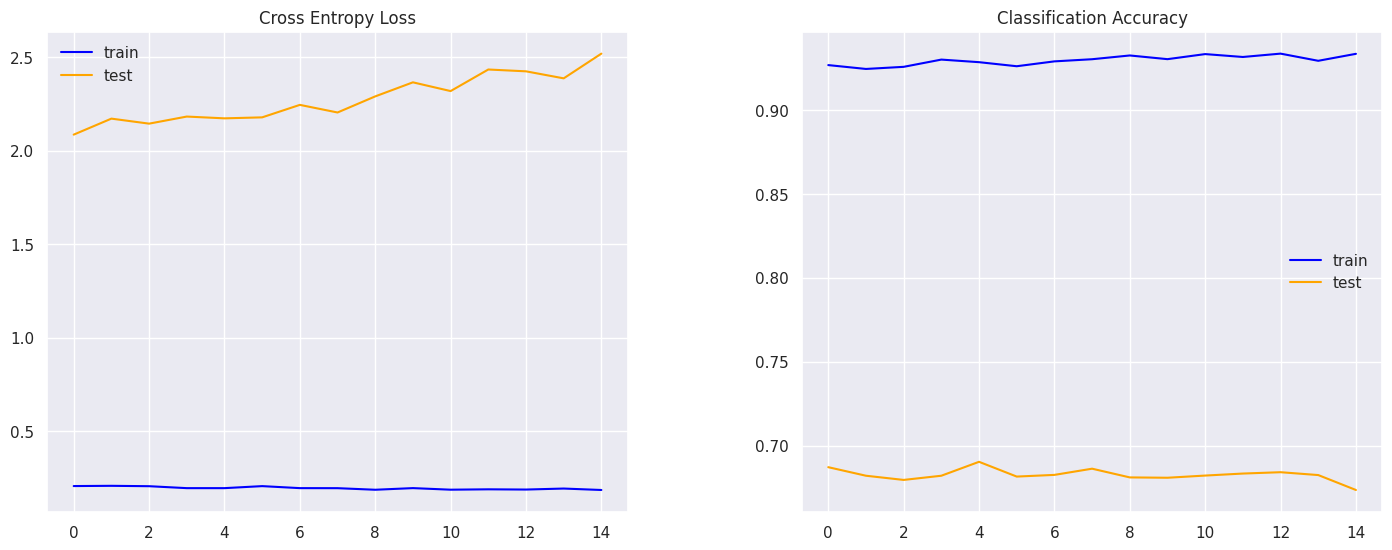

In [244]:
# History
summarize_diagnostics(history)

In [245]:
# Evaluation
score = model.evaluate(test_norm, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.52065372467041
Test accuracy: 0.6735000014305115


In [246]:
accuracy_list.append(round(score[1],4))

In [247]:
# model 4
# NC = 2, BN = YES, FC = 1
def model_4():
 model = Sequential()

 # first convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same',
input_shape=(32, 32, 3)))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # second convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # third convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # fully connected classifier
 model.add(Flatten())
 model.add(Dense(50, activation='relu'))
 model.add(Dense(10, activation='softmax'))
 model.add(Dropout(0.1))

 # compile model
 opt = optimizers.Adam(learning_rate=0.001)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

 return model

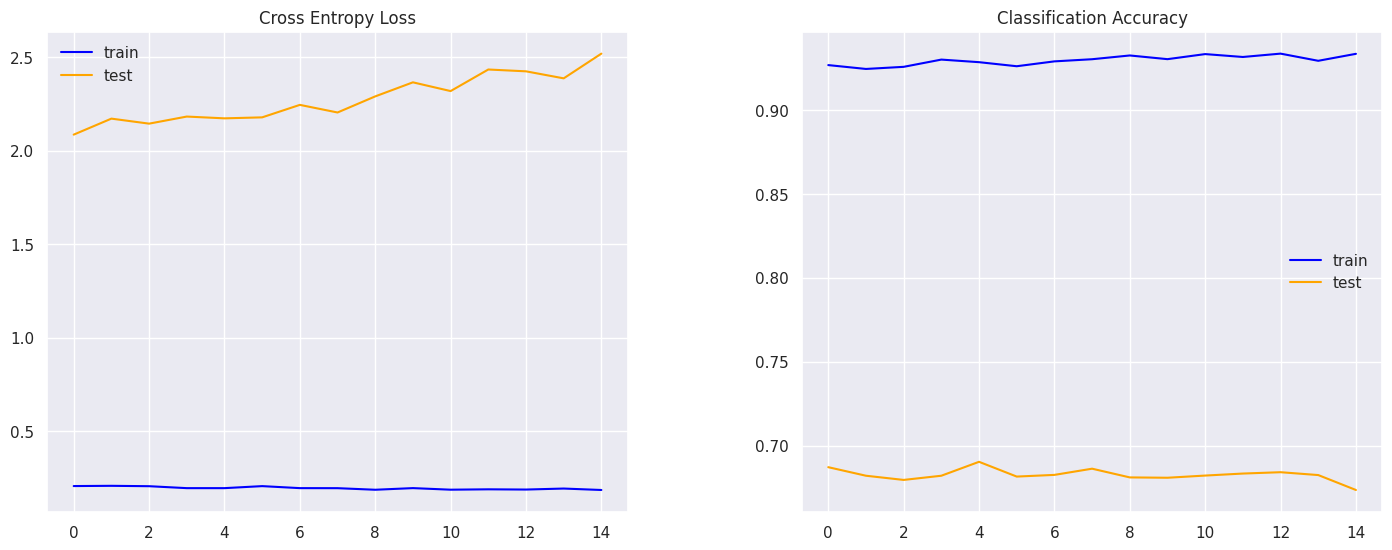

In [248]:
# History
summarize_diagnostics(history)

In [249]:
# Evaluation
score = model.evaluate(test_norm, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.52065372467041
Test accuracy: 0.6735000014305115


In [250]:
accuracy_list.append(round(score[1],4))

In [251]:
# model 5
# NC = 2, BN = YES, FC = 2
def model_5():
 model = Sequential()

 # first convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same',
input_shape=(32, 32, 3)))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # second convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # third convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # fully connected classifier
 model.add(Flatten())
 model.add(Dense(100, activation='relu'))
 model.add(Dense(50, activation='relu'))
 model.add(Dense(10, activation='softmax'))
 model.add(Dropout(0.1))

 # compile model
 opt = optimizers.Adam(learning_rate=0.001)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

 return model

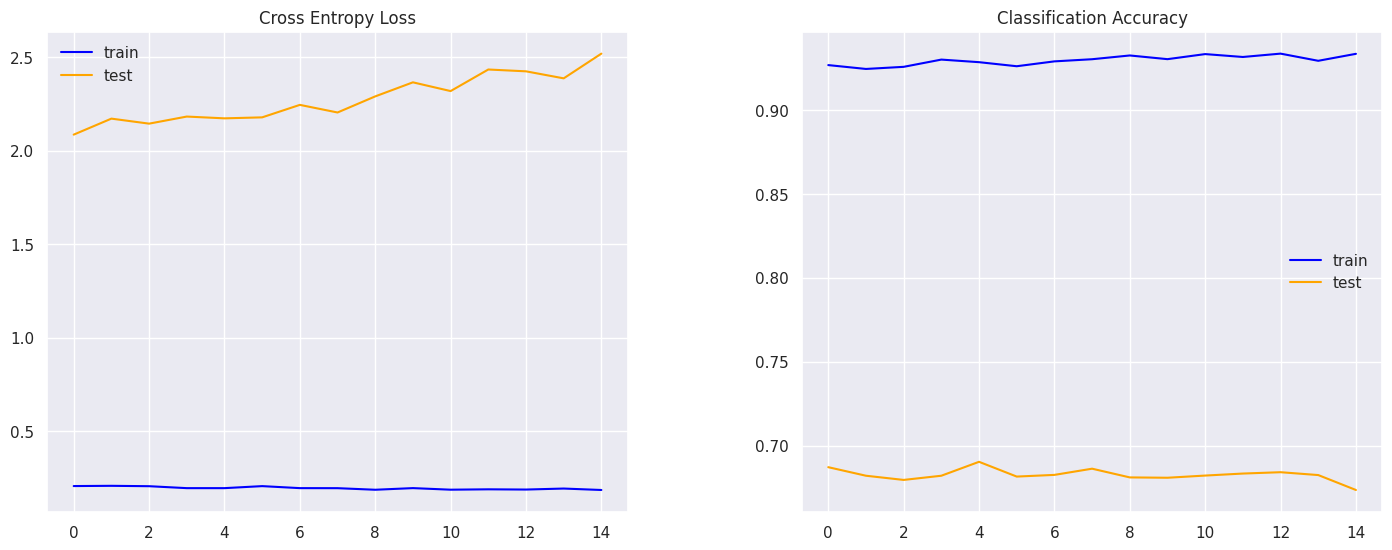

In [252]:
# History
summarize_diagnostics(history)

In [253]:
# Evaluation
score = model.evaluate(test_norm, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.52065372467041
Test accuracy: 0.6735000014305115


In [254]:
accuracy_list.append(round(score[1],4))

In [255]:
def model_6():
 model = Sequential()

 # first convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same',
input_shape=(32, 32, 3)))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # second convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # third convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # fully connected classifier
 model.add(Flatten())
 model.add(Dense(10, activation='softmax'))
 model.add(Dropout(0.1))

 # compile model
 opt = optimizers.Adam(learning_rate=0.001)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

 return model

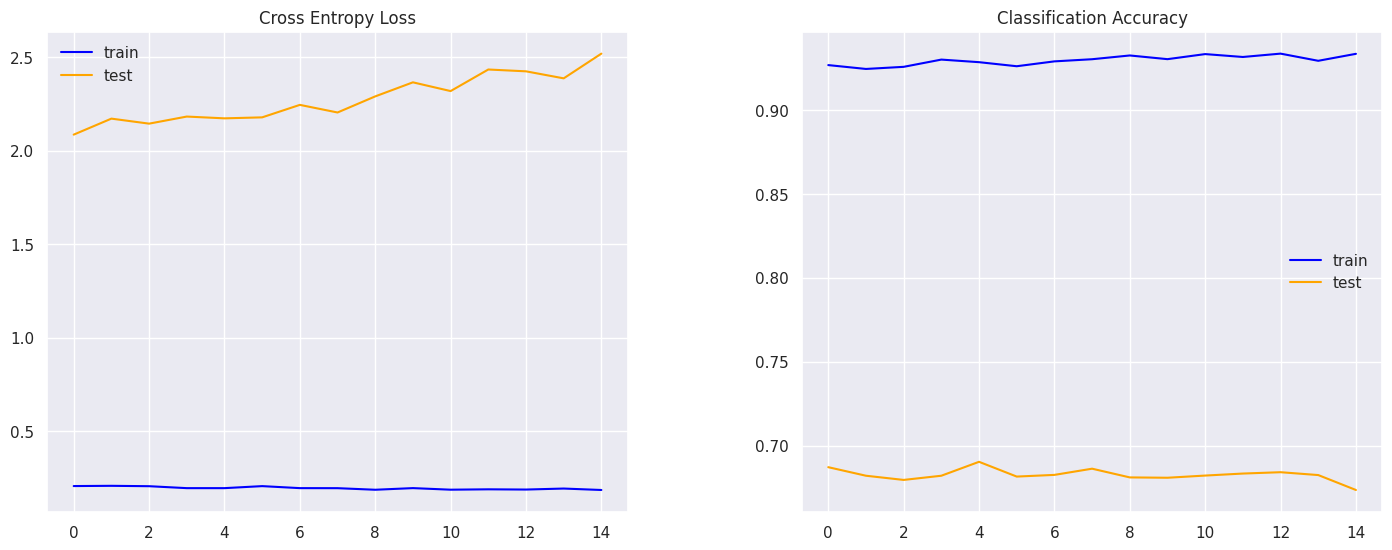

In [256]:
# History
summarize_diagnostics(history)

In [257]:
# Evaluation
score = model.evaluate(test_norm, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.52065372467041
Test accuracy: 0.6735000014305115


In [258]:
accuracy_list.append(round(score[1],4))

In [259]:
def model_7():
 model = Sequential()

 # first convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same',
input_shape=(32, 32, 3)))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # second convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # third convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # fully connected classifier
 model.add(Flatten())
 model.add(Dense(1024, activation='relu'))
 model.add(Dense(10, activation='softmax'))
 model.add(Dropout(0.1))

 # compile model
 opt = optimizers.Adam(learning_rate=0.001)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

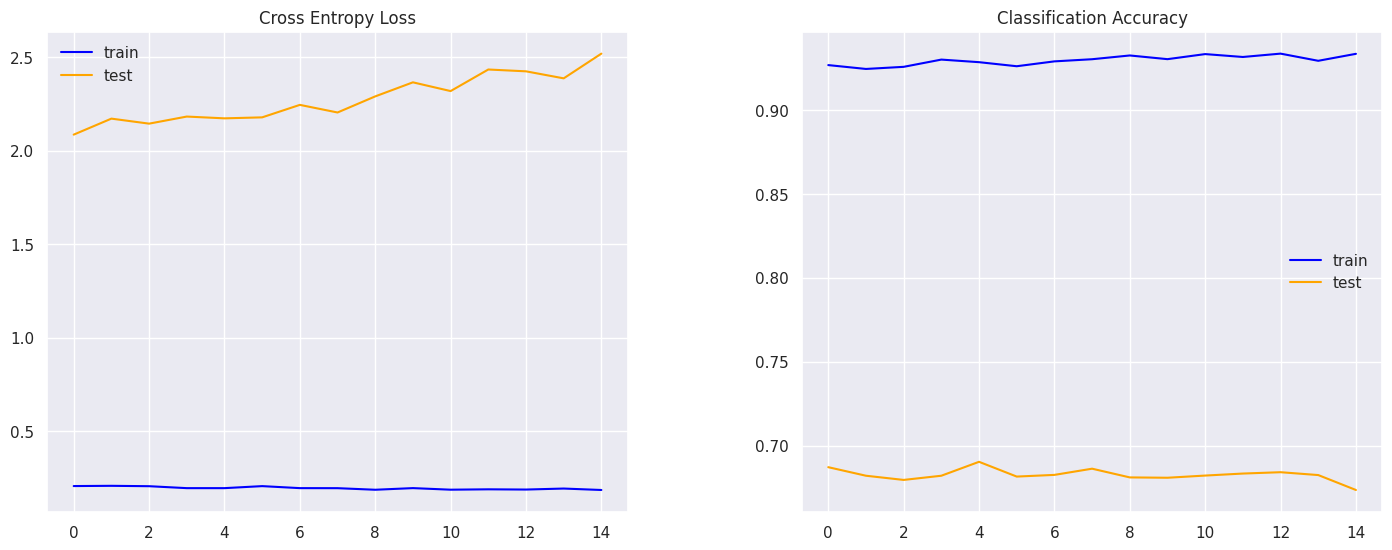

In [260]:
# History
summarize_diagnostics(history)

In [261]:
# Evaluation
score = model.evaluate(test_norm, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.52065372467041
Test accuracy: 0.6735000014305115


In [262]:
accuracy_list.append(round(score[1],4))

In [263]:
def model_8():
 model = Sequential()

 # first convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same',
input_shape=(32, 32, 3)))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # second convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # third convolutional layer
 model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
 model.add(BatchNormalization())
 model.add(Activation('relu'))
 model.add(MaxPooling2D((2, 2)))

 # fully connected classifier
 model.add(Flatten())
 model.add(Dense(1024, activation='relu'))
 model.add(Dense(512, activation='relu'))
 model.add(Dense(10, activation='softmax'))
 model.add(Dropout(0.1))

 # compile model
 opt = optimizers.Adam(learning_rate=0.001)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

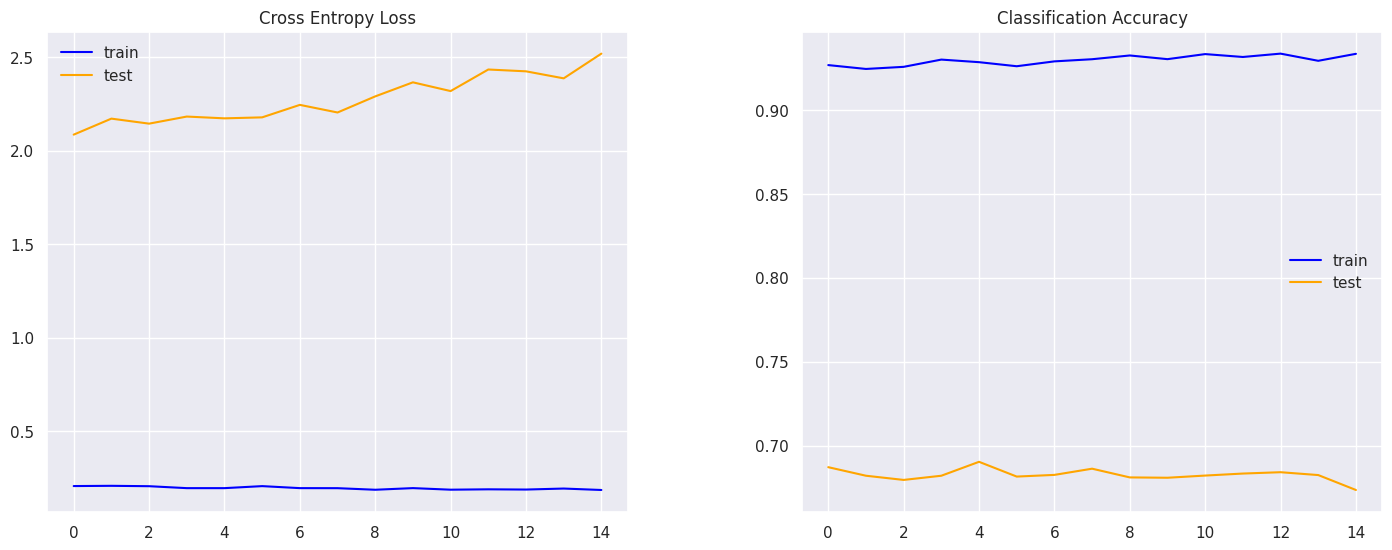

In [264]:
# History
summarize_diagnostics(history)

In [265]:
# Evaluation
score = model.evaluate(test_norm, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.52065372467041
Test accuracy: 0.6735000014305115


In [266]:
accuracy_list.append(round(score[1],4))

In [267]:
from pandas import Series, DataFrame
import numpy as np
df = {'model' : ['model1', 'model2', 'model3', 'model4', 'model5', 'model6', 'model7', 'model8'],
 'accuracy' : accuracy_list}
acc_df = DataFrame(df)
acc_df

model  accuracy
0  model1    0.6968
1  model2    0.6934
2  model3    0.6735
3  model4    0.6735
4  model5    0.6735
5  model6    0.6735
6  model7    0.6735
7  model8    0.6735

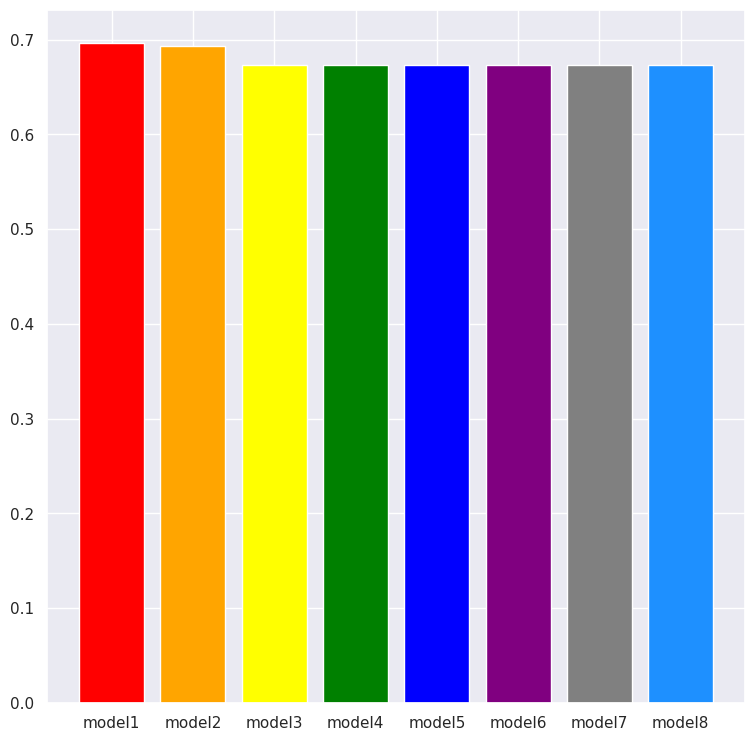

The best model : model1
Accuracy of the best model : 0.6968


In [268]:
import matplotlib.pyplot as plt
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'Gray', 'dodgerblue']
plt.bar(acc_df['model'], acc_df['accuracy'], color = colors)
plt.show()
print("The best model :", acc_df.loc[np.argmax(accuracy_list)][0])
print("Accuracy of the best model :", acc_df.loc[np.argmax(accuracy_list)][1] )

In [4]:
!wget --no-check-certificate \
 https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
 -O /tmp/cats_and_dogs_filtered.zip

--2024-06-09 04:42:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.167.207, 142.251.16.207, 172.253.62.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.167.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  58.7MB/s    in 1.1s    

2024-06-09 04:42:45 (58.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [5]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

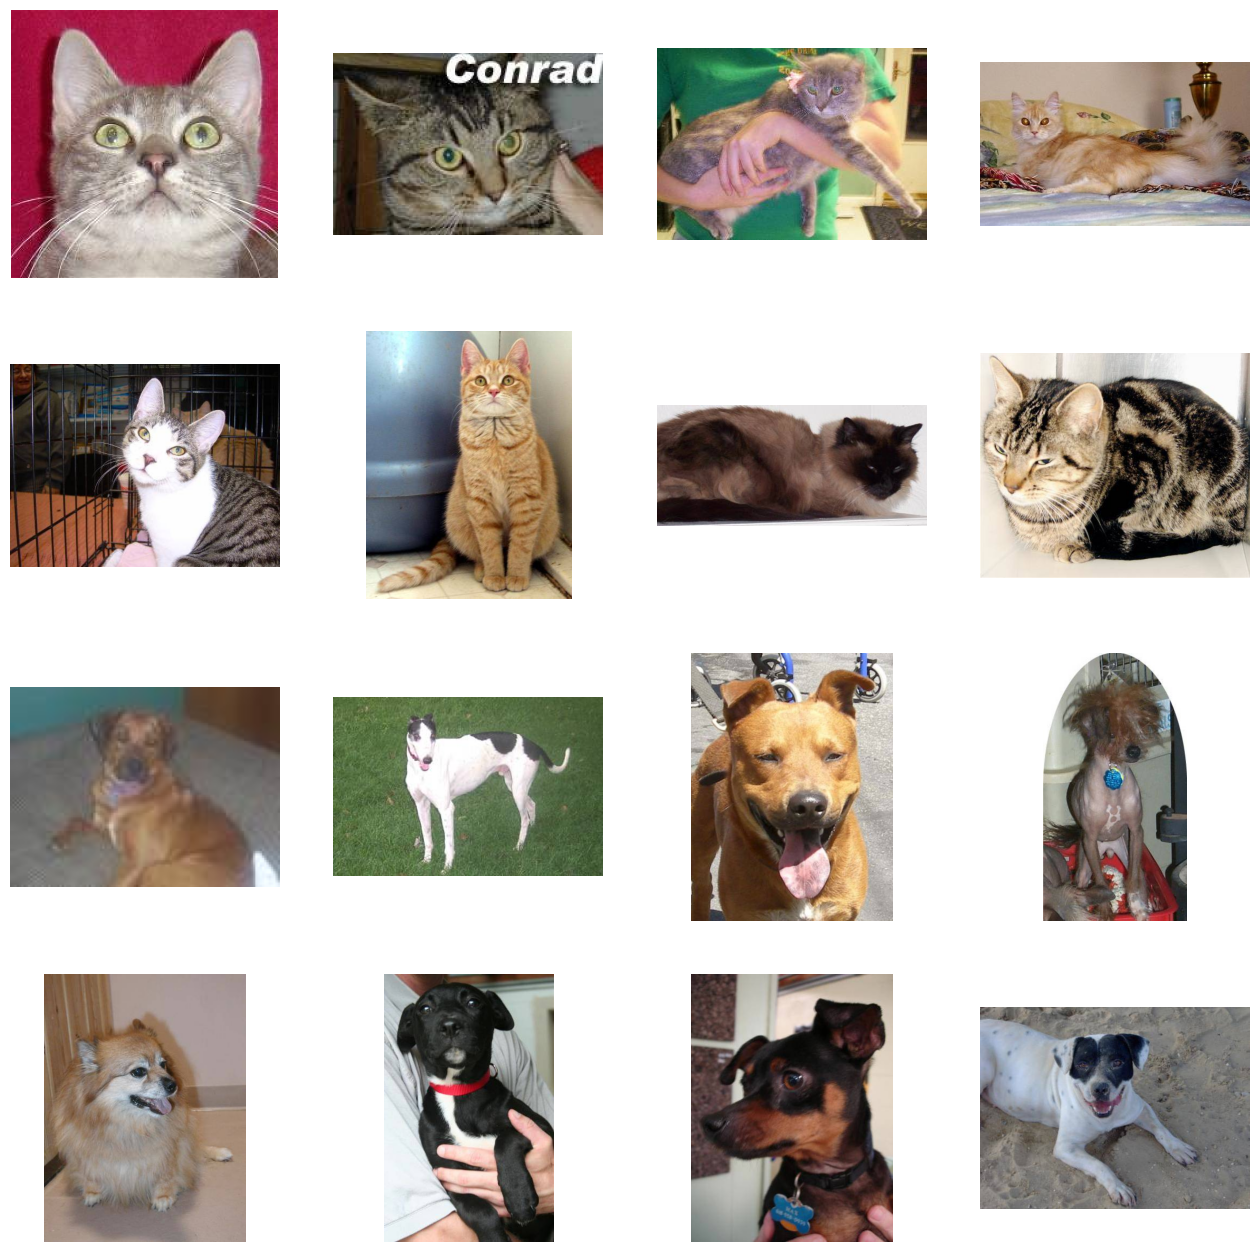

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
next_cat_pix = [os.path.join(train_cats_dir, fname)
 for fname in train_cat_fnames[ pic_index-8:pic_index]
 ]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
 for fname in train_dog_fnames[ pic_index-8:pic_index]
 ]
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
 # Set up subplot; subplot indices start at 1
 sp = plt.subplot(nrows, ncols, i + 1)
 sp.axis('Off') # Don't show axes (or gridlines)
 img = mpimg.imread(img_path)
 plt.imshow(img)
plt.show()

In [272]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., # normalization
 rotation_range = 40, width_shift_range = 0.2,
height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode =
'binary', target_size = (224, 224))

Found 2000 images belonging to 2 classes.


In [273]:
# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20,
class_mode = 'binary', target_size = (224, 224))

Found 1000 images belonging to 2 classes.


In [274]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
 include_top = False, # Leave out the last fully connected layer
 weights = 'imagenet')

58889256/58889256 [==============================] - 3s 0us/step


In [275]:
for layer in base_model.layers:
 layer.trainable = False

In [276]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss =
'binary_crossentropy',metrics = ['acc'])

In [277]:
vgghist = model.fit(train_generator, validation_data = validation_generator,
steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 1682s 17s/step - loss: 0.6747 - acc: 0.6880 - val_loss: 0.4584 - val_acc: 0.7700
Epoch 2/10
100/100 [==============================] - 1676s 17s/step - loss: 0.4890 - acc: 0.7595 - val_loss: 0.2963 - val_acc: 0.8670
Epoch 3/10
100/100 [==============================] - 1649s 17s/step - loss: 0.4220 - acc: 0.8035 - val_loss: 0.2251 - val_acc: 0.9090
Epoch 4/10
100/100 [==============================] - 1675s 17s/step - loss: 0.3916 - acc: 0.8195 - val_loss: 0.2619 - val_acc: 0.8810
Epoch 5/10
100/100 [==============================] - 1652s 17s/step - loss: 0.3783 - acc: 0.8255 - val_loss: 0.2288 - val_acc: 0.9090
Epoch 6/10
100/100 [==============================] - 1644s 17s/step - loss: 0.3656 - acc: 0.8350 - val_loss: 0.2350 - val_acc: 0.8990
Epoch 7/10
100/100 [==============================] - 1645s 16s/step - loss: 0.3438 - acc: 0.8505 - val_loss: 0.2181 - val_acc: 0.9070
Epoch 8/10
100/100 [==============================] - 1

In [8]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40,
width_shift_range = 0.2, height_shift_range = 0.2,
shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [9]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20,
class_mode = 'binary',
target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20,
class_mode = 'binary',
target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

87910968/87910968 [==============================] - 0s 0us/step


In [11]:
for layer in base_model.layers:
 layer.trainable = False

In [13]:
import tensorflow as tf

In [14]:
from tensorflow.keras.optimizers import RMSprop
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',
metrics = ['acc'])

In [15]:
inc_history = model.fit_generator(train_generator, validation_data = validation_generator,
steps_per_epoch = 100, epochs = 10)

<ipython-input-15-7656d77087a7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  inc_history = model.fit_generator(train_generator, validation_data = validation_generator,


Epoch 1/10
100/100 [==============================] - 182s 2s/step - loss: 1.2730 - acc: 0.8495 - val_loss: 0.2182 - val_acc: 0.9440
Epoch 2/10
100/100 [==============================] - 168s 2s/step - loss: 0.4337 - acc: 0.8935 - val_loss: 0.6435 - val_acc: 0.8850
Epoch 3/10
100/100 [==============================] - 168s 2s/step - loss: 0.3427 - acc: 0.8995 - val_loss: 0.1999 - val_acc: 0.9380
Epoch 4/10
100/100 [==============================] - 207s 2s/step - loss: 0.2741 - acc: 0.9030 - val_loss: 0.1220 - val_acc: 0.9580
Epoch 5/10
100/100 [==============================] - 165s 2s/step - loss: 0.2514 - acc: 0.9205 - val_loss: 0.2049 - val_acc: 0.9400
Epoch 6/10
100/100 [==============================] - 164s 2s/step - loss: 0.2519 - acc: 0.9200 - val_loss: 0.1714 - val_acc: 0.9470
Epoch 7/10
100/100 [==============================] - 163s 2s/step - loss: 0.2186 - acc: 0.9270 - val_loss: 0.1894 - val_acc: 0.9440
Epoch 8/10
100/100 [==============================] - 163s 2s/step - 

In [16]:
# improt library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras import Sequential

In [17]:
# data 생성
x = np.arange(0, 100, 0.1)
y = np.sin(2*x) + np.cos(x)
seq_data = y.reshape(-1,1)
print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[1.        ]
 [1.1936735 ]
 [1.36948492]
 [1.51997896]
 [1.63841708]]


In [18]:
plt.grid()
plt.title('y = sin(2x)+cos(x)')
plt.xlabel('time')
plt.ylabel('y')
plt.plot(seq_data)
plt.show()

In [19]:
# function for 3D tensor
def seq2dataset(seq, time_steps, input_dim):
 X = []
 Y = []
 for i in range(len(seq)-(time_steps+input_dim)+1):
  x = seq[i:(i+time_steps)]
  y = (seq[i+time_steps+input_dim-1])
  X.append(x)
  Y.append(y)
 return np.array(X), np.array(Y)

In [20]:
t = 20 # time steps
h = 1 # input_dim

In [21]:
X, Y = seq2dataset(seq_data, t, h)
print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [22]:
# split train/test data
split_ratio = 0.8
split = int(split_ratio*len(X))
x_train = X[0:split]
y_train = Y[0:split]
x_test = X[split:]
y_test = Y[split:]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [23]:
model = Sequential()
#model.add(SimpleRNN(units=128, activation='tanh',input_shape=x_train[0].shape))
model.add(SimpleRNN(units=128, activation='tanh',input_shape=(20,1)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16769 (65.50 KB)
Trainable params: 16769 (65.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [25]:
from datetime import datetime
start_time = datetime.now() # calculate training time
hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))
end_time = datetime.now()
print('Elapsed Time => ', end_time-start_time)

Epoch 1/100
25/25 [==============================] - 2s 18ms/step - loss: 0.0583 - mae: 0.1476 - val_loss: 0.0034 - val_mae: 0.0484
Epoch 2/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0017 - mae: 0.0338 - val_loss: 4.9405e-04 - val_mae: 0.0176
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 3.2922e-04 - mae: 0.0147 - val_loss: 7.3016e-05 - val_mae: 0.0069
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 7.1304e-05 - mae: 0.0067 - val_loss: 2.5151e-05 - val_mae: 0.0043
Epoch 5/100
25/25 [==============================] - 0s 15ms/step - loss: 2.7316e-05 - mae: 0.0043 - val_loss: 1.6172e-05 - val_mae: 0.0032
Epoch 6/100
25/25 [==============================] - 0s 15ms/step - loss: 1.6617e-05 - mae: 0.0034 - val_loss: 1.8127e-05 - val_mae: 0.0036
Epoch 7/100
25/25 [==============================] - 0s 14ms/step - loss: 9.7455e-06 - mae: 0.0026 - val_loss: 7.0840e-06 - val_mae: 0.0021
Epoch 8/100
25/25 [================

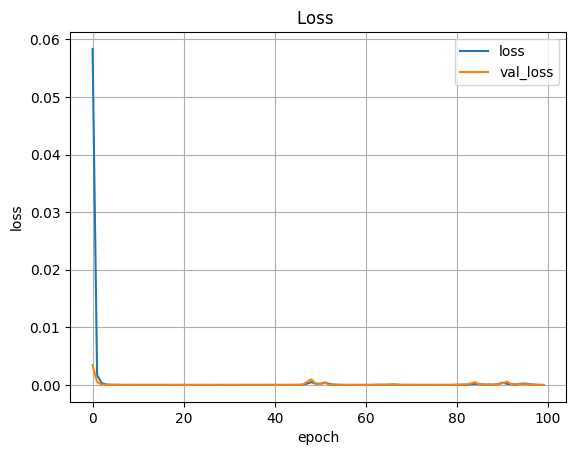

In [26]:
plt.title('Loss ')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='best')
plt.show()

In [27]:
pred = model.predict(x_test)

7/7 [==============================] - 0s 4ms/step


In [29]:
# setting random seed
np.random.seed(1886)
rand_idx = np.random.randint(0, len(y_test), size=5)
print('random idx = ',rand_idx, '\n')
print('pred = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

random idx =  [166  62  33  92 105] 

pred =  [-1.6268114  -0.19659485 -1.2128888  -0.19457684 -1.378668  ]
label =  [-1.62753387 -0.19606911 -1.21355631 -0.19342387 -1.37960403]


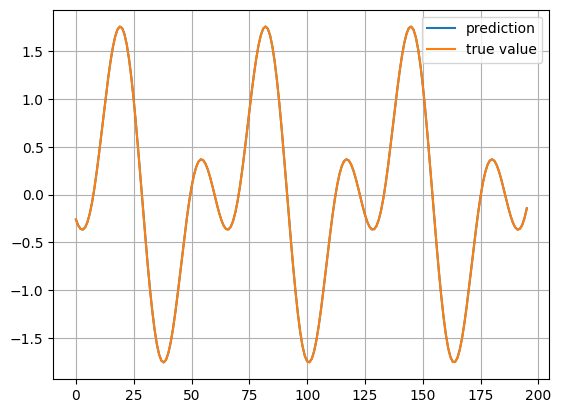

In [30]:
plt.plot(pred, label='prediction')
plt.plot(y_test, label='true value')
plt.grid()
plt.legend(loc='best')
plt.show()

In [31]:
# import library
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.metrics import r2_score
import plotly.graph_objects as go

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
# load dataset
raw_df = pd.read_csv('/content/drive/MyDrive/samsung_electronics_.csv')
print(raw_df.shape)
raw_df.head()

(5528, 7)


Date    Open    High     Low   Close    Adj Close    Volume
0  2000-09-01  5540.0  5600.0  5420.0  5540.0  4192.145020  49955000
1  2000-09-04  5440.0  5550.0  5310.0  5340.0  4040.806396  28625000
2  2000-09-05  5260.0  5340.0  5030.0  5150.0  3897.030029  79765000
3  2000-09-06  5200.0  5280.0  5090.0  5150.0  3897.030029  53120000
4  2000-09-07  4940.0  4980.0  4760.0  4790.0  3624.616699  83905000

In [34]:
# add columns
raw_df['3MA'] = raw_df['Close'].rolling(window = 3).mean()
raw_df['5MA'] = raw_df['Close'].rolling(window = 5).mean()
raw_df.head()

Date    Open    High     Low   Close    Adj Close    Volume  \
0  2000-09-01  5540.0  5600.0  5420.0  5540.0  4192.145020  49955000   
1  2000-09-04  5440.0  5550.0  5310.0  5340.0  4040.806396  28625000   
2  2000-09-05  5260.0  5340.0  5030.0  5150.0  3897.030029  79765000   
3  2000-09-06  5200.0  5280.0  5090.0  5150.0  3897.030029  53120000   
4  2000-09-07  4940.0  4980.0  4760.0  4790.0  3624.616699  83905000   

           3MA     5MA  
0          NaN     NaN  
1          NaN     NaN  
2  5343.333333     NaN  
3  5213.333333     NaN  
4  5030.000000  5194.0

In [35]:
import numpy as np
raw_df['3MA_new'] = np.NaN
raw_df['5MA_new'] = np.NaN

In [36]:
for i in range(len(raw_df)-1):
 raw_df.iloc[i+1,9] = raw_df.iloc[i,7]
 raw_df.iloc[i+1,10] = raw_df.iloc[i,8]

In [37]:
df2 = raw_df.copy()
raw_df.head(6)

Date    Open    High     Low   Close    Adj Close    Volume  \
0  2000-09-01  5540.0  5600.0  5420.0  5540.0  4192.145020  49955000   
1  2000-09-04  5440.0  5550.0  5310.0  5340.0  4040.806396  28625000   
2  2000-09-05  5260.0  5340.0  5030.0  5150.0  3897.030029  79765000   
3  2000-09-06  5200.0  5280.0  5090.0  5150.0  3897.030029  53120000   
4  2000-09-07  4940.0  4980.0  4760.0  4790.0  3624.616699  83905000   
5  2000-09-08  4900.0  4930.0  4790.0  4880.0  3692.720703  57170000   

           3MA     5MA      3MA_new  5MA_new  
0          NaN     NaN          NaN      NaN  
1          NaN     NaN          NaN      NaN  
2  5343.333333     NaN          NaN      NaN  
3  5213.333333     NaN  5343.333333      NaN  
4  5030.000000  5194.0  5213.333333      NaN  
5  4940.000000  5062.0  5030.000000   5194.0

In [38]:
plt.title('SAMSUNG ELECTRONIC STCOK PRICE')
plt.ylabel('price')
plt.xlabel('period')
plt.grid()
plt.plot(raw_df['Close'], label='Close')
plt.show()

In [39]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = raw_df['Date'], y = raw_df['Close']))
fig.show()

In [40]:
raw_df.describe()

Open          High           Low         Close     Adj Close  \
count   5528.000000   5528.000000   5528.000000   5528.000000   5528.000000   
mean   25981.065485  26239.493488  25717.206946  25975.984081  22684.264165   
std    20430.668835  20599.558283  20254.349994  20414.717698  20074.980642   
min     2540.000000   2760.000000   2420.000000   2730.000000   2065.804688   
25%    10820.000000  10960.000000  10680.000000  10820.000000   8268.144287   
50%    18050.000000  18300.000000  17810.000000  18030.000000  14442.782715   
75%    37755.000000  38170.000000  37427.500000  37885.000000  32633.070801   
max    90300.000000  96800.000000  89500.000000  91000.000000  88367.835938   

             Volume           3MA           5MA       3MA_new       5MA_new  
count  5.528000e+03   5526.000000   5524.000000   5525.000000   5523.000000  
mean   2.094515e+07  25974.200748  25972.468139  25968.730015  25966.904581  
std    1.440244e+07  20409.319297  20404.506985  20407.114019  20402.163765  
min    0.000000e+00   2790.000000   2810.000000   2790.000000   2810.000000  
25%    1.170836e+07  10815.000000  10840.000000  10813.333333  10840.000000  
50%    1.726500e+07  18043.333333  18036.000000  18040.000000  18024.000000  
75%    2.599000e+07  37916.666667  37938.000000  37866.666667  37878.000000  
max    1.642150e+08  90433.333333  89960.000000  90433.333333  89960.000000

In [41]:
# Missing Data
raw_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          2
5MA          4
3MA_new      3
5MA_new      5
dtype: int64

In [42]:
raw_df.loc[raw_df['Volume']==0]

Date     Open     High      Low    Close     Adj Close  Volume  \
6     2000-09-11   4880.0   4880.0   4880.0   4880.0   3692.720703       0   
7     2000-09-12   4880.0   4880.0   4880.0   4880.0   3692.720703       0   
8     2000-09-13   4880.0   4880.0   4880.0   4880.0   3692.720703       0   
22    2000-10-03   3810.0   3810.0   3810.0   3810.0   2883.045898       0   
31    2000-10-16   3030.0   3030.0   3030.0   3030.0   2292.816406       0   
...          ...      ...      ...      ...      ...           ...     ...   
5391  2022-02-28  71900.0  71900.0  71900.0  71900.0  71095.539063       0   
5394  2022-03-04  72900.0  72900.0  72900.0  72900.0  72084.343750       0   
5397  2022-03-10  69500.0  69500.0  69500.0  69500.0  68722.390625       0   
5400  2022-03-15  70200.0  70200.0  70200.0  70200.0  69414.554688       0   
5402  2022-03-17  70400.0  70400.0  70400.0  70400.0  69612.320313       0   

               3MA      5MA       3MA_new  5MA_new  
6      4850.000000   4970.0   4940.000000   5062.0  
7      4880.000000   4916.0   4850.000000   4970.0  
8      4880.000000   4862.0   4880.000000   4916.0  
22     3886.666667   3950.0   3970.000000   3988.0  
31     3066.666667   3216.0   3130.000000   3348.0  
...            ...      ...           ...      ...  
5391  71766.666667  72780.0  72566.666667  73260.0  
5394  72500.000000  72260.0  72166.666667  71980.0  
5397  69700.000000  70980.0  70833.333333  71420.0  
5400  70133.333333  69880.0  69900.000000  69860.0  
5402  70333.333333  70240.0  70266.666667  70060.0  

[115 rows x 11 columns]

In [43]:
for col in raw_df.columns:
 missing_rows = raw_df.loc[raw_df[col]==0].shape[0]
 print(col + ': ' + str(missing_rows))

Date: 0
Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 115
3MA: 0
5MA: 0
3MA_new: 0
5MA_new: 0


In [44]:
raw_df['Volume'] = raw_df['Volume'].replace(0, np.nan)

In [45]:
for col in raw_df.columns:
 missing_rows = raw_df.loc[raw_df[col]==0].shape[0]
 print(col + ': ' + str(missing_rows))

Date: 0
Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 0
3MA: 0
5MA: 0
3MA_new: 0
5MA_new: 0


In [46]:
raw_df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       115
3MA            2
5MA            4
3MA_new        3
5MA_new        5
dtype: int64

In [47]:
raw_df = raw_df.dropna()
raw_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
3MA_new      0
5MA_new      0
dtype: int64

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', '3MA', '5MA', 'Volume', '3MA_new',
'5MA_new']

In [49]:
scaled_df = scaler.fit_transform(raw_df[scale_cols])
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)
print(scaled_df)

          Open      High       Low     Close  Adj Close       3MA       5MA  \
0     0.026892  0.023075  0.027216  0.024357   0.018851  0.024531  0.025617   
1     0.023473  0.020736  0.023197  0.022431   0.017361  0.023200  0.023138   
2     0.022334  0.019779  0.021589  0.018353   0.014204  0.021184  0.021921   
3     0.016750  0.014462  0.014699  0.014048   0.010872  0.017723  0.019832   
4     0.016522  0.017120  0.016996  0.016200   0.012538  0.015632  0.018180   
...        ...       ...       ...       ...        ...       ...       ...   
5403  0.620556  0.592726  0.624483  0.627280   0.649280  0.613585  0.619190   
5404  0.611440  0.578903  0.616445  0.612552   0.634217  0.616628  0.618501   
5405  0.620556  0.577839  0.615296  0.603489   0.624947  0.618149  0.615976   
5406  0.604603  0.570396  0.609554  0.605755   0.627264  0.610923  0.616435   
5407  0.612580  0.576776  0.615296  0.608021   0.629582  0.609402  0.618272   

        Volume   3MA_new   5MA_new  
0     0.348031

In [50]:
def make_sequene_dataset(feature, label, window_size):
 feature_list = []
 label_list = []
 for i in range(len(feature)-window_size):
  feature_list.append(feature[i:i+window_size])
  label_list.append(label[i+window_size])
 return np.array(feature_list), np.array(label_list)

In [51]:
feature_cols = ['3MA_new', '5MA_new']
label_cols = ['Close']
feature_df = pd.DataFrame(scaled_df, columns=feature_cols)
label_df = pd.DataFrame(scaled_df, columns=label_cols)

In [52]:
feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()
print(feature_np.shape, label_np.shape)

(5408, 2) (5408, 1)


In [53]:
feature_np

array([[0.02555813, 0.02735513],
       [0.02384665, 0.02354561],
       [0.02320009, 0.02336202],
       ...,
       [0.616628  , 0.61858864],
       [0.61814932, 0.61606426],
       [0.61092306, 0.61652324]])

In [54]:
window_size = 40
X, Y = make_sequene_dataset(feature_np, label_np, window_size)
print(X.shape, Y.shape)

(5368, 40, 2) (5368, 1)


In [55]:
split = int(len(X)*0.95)
x_train = X[0:split]
y_train = Y[0:split]
x_test = X[split:]
y_test = Y[split:]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5099, 40, 2) (5099, 1)
(269, 40, 2) (269, 1)


In [56]:
# LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, activation='tanh', input_shape=x_train[0].shape))
model_lstm.add(Dense(1, activation='linear'))

In [57]:
model_lstm.compile(loss='mse', optimizer='adam', metrics=['mse'])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 67201 (262.50 KB)
Trainable params: 67201 (262.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)
model_lstm.fit(x_train, y_train,
 validation_data=(x_test, y_test),
 epochs=100, batch_size=16,callbacks=[early_stop])

Epoch 1/100
319/319 [==============================] - 12s 30ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 5.9572e-04 - val_mse: 5.9572e-04
Epoch 2/100
319/319 [==============================] - 12s 38ms/step - loss: 1.9349e-04 - mse: 1.9349e-04 - val_loss: 6.0384e-04 - val_mse: 6.0384e-04
Epoch 3/100
319/319 [==============================] - 9s 30ms/step - loss: 1.7524e-04 - mse: 1.7524e-04 - val_loss: 6.8545e-04 - val_mse: 6.8545e-04
Epoch 4/100
319/319 [==============================] - 8s 26ms/step - loss: 1.8505e-04 - mse: 1.8505e-04 - val_loss: 7.4627e-04 - val_mse: 7.4627e-04
Epoch 5/100
319/319 [==============================] - 10s 32ms/step - loss: 1.6293e-04 - mse: 1.6293e-04 - val_loss: 4.9838e-04 - val_mse: 4.9838e-04
Epoch 6/100
319/319 [==============================] - 7s 23ms/step - loss: 1.5320e-04 - mse: 1.5320e-04 - val_loss: 4.5232e-04 - val_mse: 4.5232e-04
Epoch 7/100
319/319 [==============================] - 18s 58ms/step - loss: 1.4935e-04 - mse: 1.4935e-04

9/9 [==============================] - 1s 32ms/step


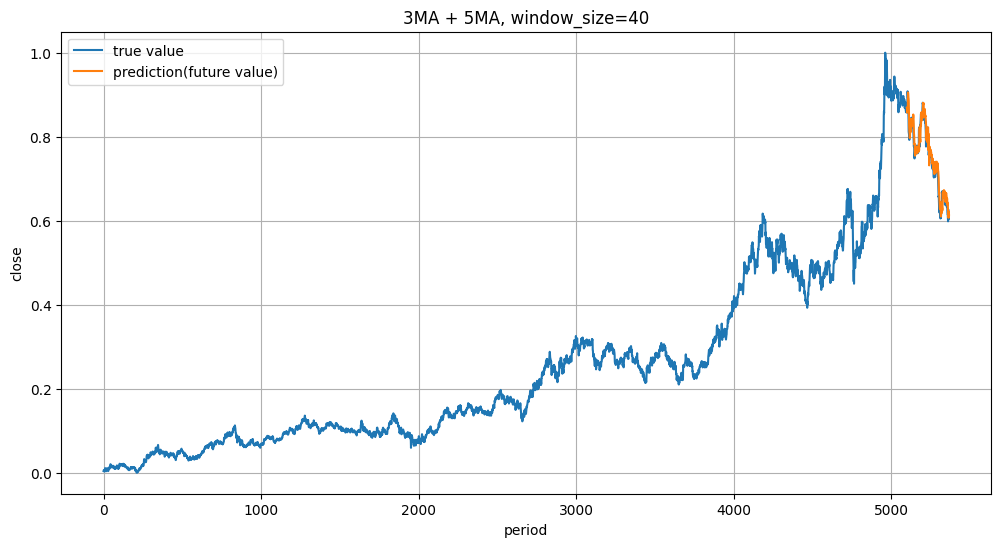

In [59]:
pred_lstm = model_lstm.predict(x_test)
x_split = range(5100,5369)
plt.figure(figsize=(12, 6))
plt.title('3MA + 5MA, window_size=40')
plt.ylabel('close')
plt.xlabel('period')
plt.plot(Y, label = 'true value')
plt.plot(x_split, pred_lstm, label = 'prediction(future value)')
plt.grid()
plt.legend(loc='best')
plt.show()

In [60]:
print(r2_score(y_test, pred_lstm))

0.9517181592462644


In [61]:
# 새로운 target column 생성
df2['R_t'] = np.NaN

In [62]:
for i in range(len(df2)-1):
 y0 = df2.iloc[i, 4]
 y1 = df2.iloc[i+1, 4]
 df2.iloc[i+1,11] = (y1 - y0)/y0

In [63]:
df2.head()

Date    Open    High     Low   Close    Adj Close    Volume  \
0  2000-09-01  5540.0  5600.0  5420.0  5540.0  4192.145020  49955000   
1  2000-09-04  5440.0  5550.0  5310.0  5340.0  4040.806396  28625000   
2  2000-09-05  5260.0  5340.0  5030.0  5150.0  3897.030029  79765000   
3  2000-09-06  5200.0  5280.0  5090.0  5150.0  3897.030029  53120000   
4  2000-09-07  4940.0  4980.0  4760.0  4790.0  3624.616699  83905000   

           3MA     5MA      3MA_new  5MA_new       R_t  
0          NaN     NaN          NaN      NaN       NaN  
1          NaN     NaN          NaN      NaN -0.036101  
2  5343.333333     NaN          NaN      NaN -0.035581  
3  5213.333333     NaN  5343.333333      NaN  0.000000  
4  5030.000000  5194.0  5213.333333      NaN -0.069903

In [64]:
# missing data 처리
df2['Volume'] = df2['Volume'].replace(0, np.nan)

In [65]:
df2 = df2.dropna()

In [66]:
df2.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
3MA_new      0
5MA_new      0
R_t          0
dtype: int64

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['3MA_new', '5MA_new', 'R_t']
scaled_df2 = scaler.fit_transform(df2[scale_cols])
scaled_df2 = pd.DataFrame(scaled_df2, columns=scale_cols)
print(scaled_df2)

       3MA_new   5MA_new       R_t
0     0.025558  0.027355  0.561470
1     0.023847  0.023546  0.382246
2     0.023200  0.023362  0.243221
3     0.021184  0.022146  0.206714
4     0.017723  0.020057  0.658627
...        ...       ...       ...
5403  0.609782  0.617900  0.648951
5404  0.613585  0.619277  0.423892
5405  0.616628  0.618589  0.451601
5406  0.618149  0.616064  0.510610
5407  0.610923  0.616523  0.510568

[5408 rows x 3 columns]


In [68]:
def make_sequene_dataset(feature, label, window_size):
 feature_list = []
 label_list = []
 for i in range(len(feature)-window_size):
  feature_list.append(feature[i:i+window_size])
  label_list.append(label[i+window_size])
 return np.array(feature_list), np.array(label_list)

In [69]:
feature_cols = ['3MA_new', '5MA_new']
label_cols = ['R_t']
feature_df = pd.DataFrame(scaled_df2, columns=feature_cols)
label_df = pd.DataFrame(df2, columns=label_cols)

In [70]:
feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()
print(feature_np.shape, label_np.shape)

(5408, 2) (5408, 1)


In [71]:
window_size = 40
X, Y = make_sequene_dataset(feature_np, label_np, window_size)
print(X.shape, Y.shape)

(5368, 40, 2) (5368, 1)


In [72]:
split = int(len(X)*0.95)
x_train = X[0:split]
y_train = Y[0:split]
x_test = X[split:]
y_test = Y[split:]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5099, 40, 2) (5099, 1)
(269, 40, 2) (269, 1)


In [73]:
# LSTM model
model_lstm2 = Sequential()
model_lstm2.add(LSTM(128, activation='tanh', input_shape=x_train[0].shape))
model_lstm2.add(Dense(1, activation='linear'))
model_lstm2.compile(loss='mse', optimizer='adam', metrics=['mse'])
model_lstm2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               67072     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 67201 (262.50 KB)
Trainable params: 67201 (262.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)
model_lstm2.fit(x_train, y_train,
 validation_data=(x_test, y_test),
 epochs=100, batch_size=16,
 callbacks=[early_stop])

Epoch 1/100
319/319 [==============================] - 12s 28ms/step - loss: 4.9803e-04 - mse: 4.9803e-04 - val_loss: 2.0204e-04 - val_mse: 2.0204e-04
Epoch 2/100
319/319 [==============================] - 10s 31ms/step - loss: 4.5956e-04 - mse: 4.5956e-04 - val_loss: 1.9947e-04 - val_mse: 1.9947e-04
Epoch 3/100
319/319 [==============================] - 9s 27ms/step - loss: 4.5016e-04 - mse: 4.5016e-04 - val_loss: 2.0013e-04 - val_mse: 2.0013e-04
Epoch 4/100
319/319 [==============================] - 10s 30ms/step - loss: 4.5379e-04 - mse: 4.5379e-04 - val_loss: 2.0692e-04 - val_mse: 2.0692e-04
Epoch 5/100
319/319 [==============================] - 10s 31ms/step - loss: 4.4975e-04 - mse: 4.4975e-04 - val_loss: 1.9895e-04 - val_mse: 1.9895e-04
Epoch 6/100
319/319 [==============================] - 8s 25ms/step - loss: 4.4872e-04 - mse: 4.4872e-04 - val_loss: 1.9958e-04 - val_mse: 1.9958e-04
Epoch 7/100
319/319 [==============================] - 10s 32ms/step - loss: 4.5141e-04 - mse: 4

9/9 [==============================] - 1s 36ms/step


<ipython-input-75-b9eabcba2bbc>:5: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



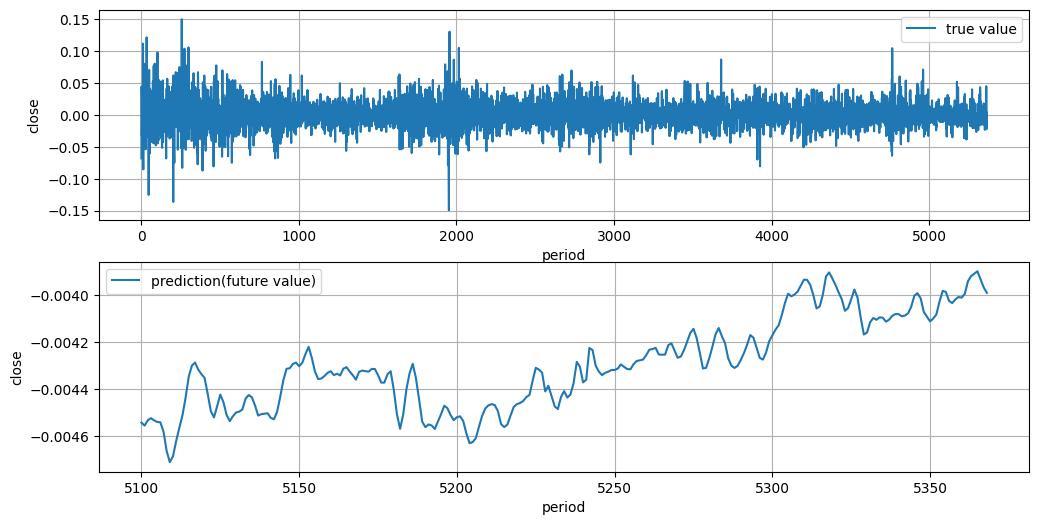

In [75]:
pred_lstm2 = model_lstm2.predict(x_test)
x_split = range(5100,5369)
plt.figure(figsize=(12, 6))
plt.title('3MA + 5MA, window_size=40')
plt.subplot(211)
plt.plot(Y, label = 'true value')
plt.ylabel('close')
plt.xlabel('period')
plt.grid()
plt.legend(loc='best')
plt.subplot(212)
plt.plot(x_split, pred_lstm2, label = 'prediction(future value)')
plt.ylabel('close')
plt.xlabel('period')
plt.grid()
plt.legend(loc='best')
plt.show()

In [76]:
print(r2_score(y_test, pred_lstm2))

-0.04961428503293264


In [77]:
model_gru = Sequential()
model_gru.add(GRU(256, activation='tanh', input_shape=x_train[0].shape))
model_gru.add(Dense(1, activation='linear'))

In [78]:
model_gru.compile(loss='mse', optimizer='adam', metrics=['mse'])
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               199680    
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 199937 (781.00 KB)
Trainable params: 199937 (781.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)
model_gru.fit(x_train, y_train,
 validation_data=(x_test, y_test),
 epochs=100, batch_size=16,
 callbacks=[early_stop])

Epoch 1/100
319/319 [==============================] - 28s 78ms/step - loss: 5.3388e-04 - mse: 5.3388e-04 - val_loss: 3.3927e-04 - val_mse: 3.3927e-04
Epoch 2/100
319/319 [==============================] - 22s 69ms/step - loss: 4.6874e-04 - mse: 4.6874e-04 - val_loss: 4.6749e-04 - val_mse: 4.6749e-04
Epoch 3/100
319/319 [==============================] - 23s 72ms/step - loss: 4.6075e-04 - mse: 4.6075e-04 - val_loss: 1.9750e-04 - val_mse: 1.9750e-04
Epoch 4/100
319/319 [==============================] - 22s 70ms/step - loss: 4.6257e-04 - mse: 4.6257e-04 - val_loss: 2.4356e-04 - val_mse: 2.4356e-04
Epoch 5/100
319/319 [==============================] - 24s 76ms/step - loss: 4.5992e-04 - mse: 4.5992e-04 - val_loss: 2.8783e-04 - val_mse: 2.8783e-04
Epoch 6/100
319/319 [==============================] - 22s 70ms/step - loss: 4.6190e-04 - mse: 4.6190e-04 - val_loss: 1.9677e-04 - val_mse: 1.9677e-04
Epoch 7/100
319/319 [==============================] - 25s 80ms/step - loss: 4.5671e-04 - mse:

9/9 [==============================] - 1s 26ms/step


<ipython-input-80-b4c90860f3ea>:5: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



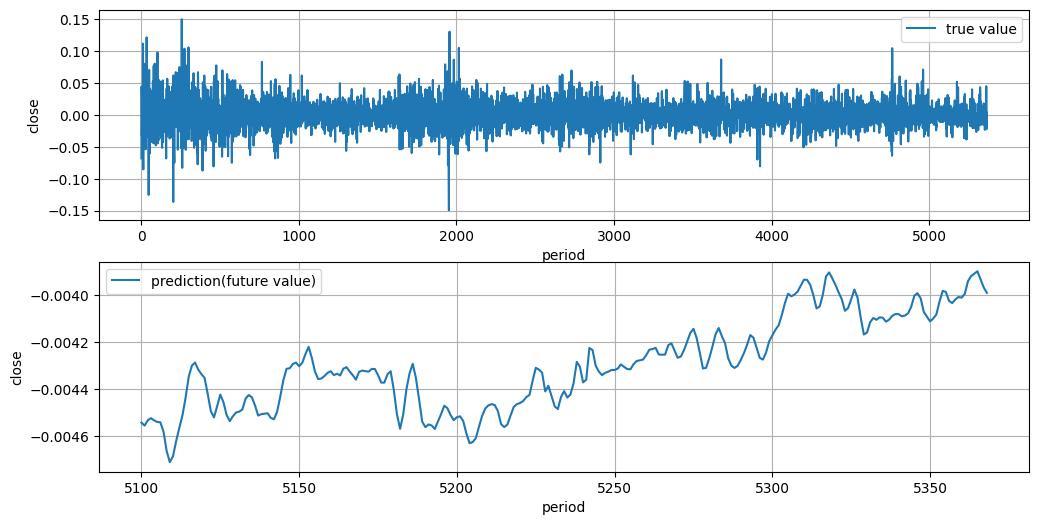

In [80]:
pred_gru = model_gru.predict(x_test)
x_split = range(5100,5369)
plt.figure(figsize=(12, 6))
plt.title('3MA + 5MA, window_size=40')
plt.subplot(211)
plt.plot(Y, label = 'true value')
plt.ylabel('close')
plt.xlabel('period')
plt.grid()
plt.legend(loc='best')
plt.subplot(212)
plt.plot(x_split, pred_lstm2, label = 'prediction(future value)')
plt.ylabel('close')
plt.xlabel('period')
plt.grid()
plt.legend(loc='best')
plt.show()

In [81]:
print(r2_score(y_test, pred_gru))

-0.11459112652580239


In [82]:
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
 for word in sample.split():
  if word not in token_index:
    token_index[word] = len(token_index) + 1
max_length = 10
results = np.zeros(shape = (len(samples), max_length, max(token_index.values())+1))
for i, sample in enumerate(samples):
 for j, word in list(enumerate(sample.split()))[:max_length]:
  index = token_index.get(word)
  results[i, j, index] = 1

In [83]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [84]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode = 'binary')
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

Found 9 unique tokens.


In [85]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Processing the labels of the raw IMDB data
import os
imdb_dir = '/content/drive/MyDrive/imdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
 dir_name = os.path.join(train_dir, label_type)
 for fname in os.listdir(dir_name):
  if fname[-4:] == '.txt':
    f = open(os.path.join(dir_name, fname),"r", encoding='latin_1')
    texts.append(f.read())
    f.close()
    if label_type == 'neg':
      labels.append(0)
    else:
      labels.append(1)

In [17]:
# Tokenizing the text of the raw IMDB data
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 10000
validation_samples = 7243
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 16 unique tokens.
Shape of data tensor: (17243, 100)
Shape of label tensor: (17243,)


In [18]:
# Training the same model without pretrained word embeddings
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, 100, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                320032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1320065 (5.04 MB)
Trainable params: 1320065 (5.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
y_train.shape

(17243,)

In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
313/313 [==============================] - 39s 12ms/step - loss: 0.5902 - acc: 0.7258 - val_loss: 0.6064 - val_acc: 0.7215
Epoch 2/20
313/313 [==============================] - 6s 18ms/step - loss: 0.5884 - acc: 0.7274 - val_loss: 0.5929 - val_acc: 0.7215
Epoch 3/20
313/313 [==============================] - 3s 11ms/step - loss: 0.5884 - acc: 0.7274 - val_loss: 0.5959 - val_acc: 0.7215
Epoch 4/20
313/313 [==============================] - 4s 11ms/step - loss: 0.5881 - acc: 0.7274 - val_loss: 0.5925 - val_acc: 0.7215
Epoch 5/20
313/313 [==============================] - 5s 15ms/step - loss: 0.5878 - acc: 0.7274 - val_loss: 0.5916 - val_acc: 0.7215
Epoch 6/20
313/313 [==============================] - 5s 15ms/step - loss: 0.5872 - acc: 0.7274 - val_loss: 0.5984 - val_acc: 0.7215
Epoch 7/20
313/313 [==============================] - 4s 14ms/step - loss: 0.5878 - acc: 0.7274 - val_loss: 0.5947 - val_acc: 0.7215
Epoch 8/20
313/313 [==============================] - 5s 15ms/step -

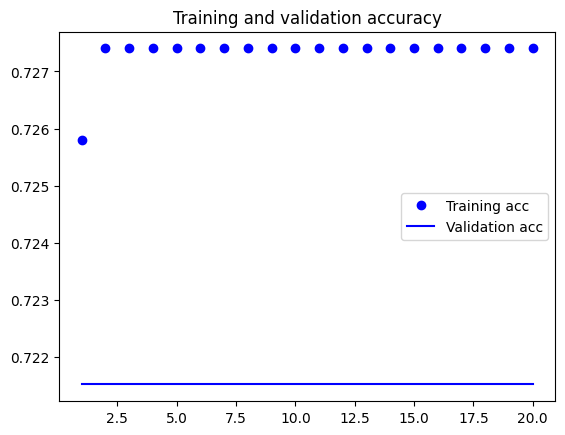

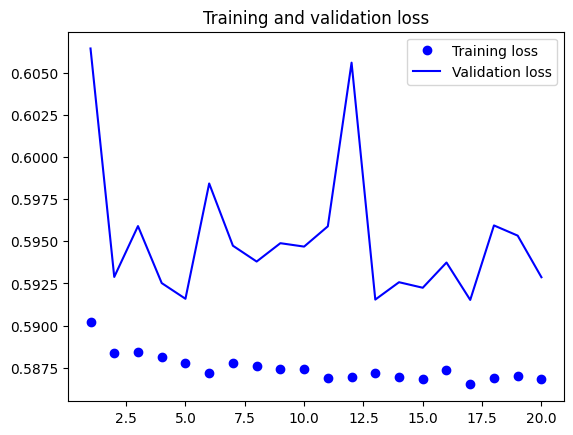

In [20]:
# Plotting the results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
# Tokenizing the data of the test set
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
 dir_name = os.path.join(test_dir, label_type)
 for fname in sorted(os.listdir(dir_name)):
  if fname[-4:] == '.txt':
    f = open(os.path.join(dir_name, fname),'r',encoding='latin_1')
    texts.append(f.read())
    f.close()
    if label_type == 'neg':
      labels.append(0)
    else:
      labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [22]:
# Evaluating the model on the test set
model.evaluate(x_test, y_test)

539/539 [==============================] - 1s 2ms/step - loss: 0.6243 - acc: 0.7249


[0.6243187785148621, 0.7249318361282349]